In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
batsman_database_2022 = pd.read_excel("Data Wrangling - IPL Players & Auction price value - Group 8 v2.2.xlsx", sheet_name = 'IPL22 - Most Runs')
batsman_database_2021 = pd.read_excel("Data Wrangling - IPL Players & Auction price value - Group 8 v2.2.xlsx", sheet_name = 'IPL21 - Most Runs')
batsman_database_2020 = pd.read_excel("Data Wrangling - IPL Players & Auction price value - Group 8 v2.2.xlsx", sheet_name = 'IPL20 - Most Runs')

batsman_database_SR_2022 = pd.read_excel("Data Wrangling - IPL Players & Auction price value - Group 8 v2.2.xlsx", sheet_name = 'IPL22 - Best Strikerate')
batsman_database_SR_2021 = pd.read_excel("Data Wrangling - IPL Players & Auction price value - Group 8 v2.2.xlsx", sheet_name = 'IPL21 - Best Strikerate')
batsman_database_SR_2020 = pd.read_excel("Data Wrangling - IPL Players & Auction price value - Group 8 v2.2.xlsx", sheet_name = 'IPL20 - Best Strikerate')


IPL_player_Auction = pd.read_excel("Data Wrangling - IPL Players & Auction price value - Group 8 v2.2.xlsx", sheet_name = 'IPLPlayerAuctionData (20-22)')

batsman_database = [batsman_database_2022,batsman_database_2021,batsman_database_2020]
batsman_database_merged = pd.concat(batsman_database)

batsman_database_SR = [batsman_database_SR_2022,batsman_database_SR_2021,batsman_database_SR_2020]
batsman_database_SR_merged = pd.concat(batsman_database_SR)


# data cleaning steps 
new_header = batsman_database_merged.iloc[0] # grab the first row for the header
batsman_database_merged = batsman_database_merged[1:] # take the data less the header row 
batsman_database_merged.columns = new_header # set the header row as batsman_database header

new_header = batsman_database_SR_merged.iloc[0] # grab the first row for the header
batsman_database_SR_merged = batsman_database_SR_merged[1:] # take the data less the header row 
batsman_database_SR_merged.columns = new_header # set the header row as batsman_database header

new_header = IPL_player_Auction.iloc[0] # grab the first row for the header
IPL_player_Auction = IPL_player_Auction[1:] # take the data less the header row 
IPL_player_Auction.columns = new_header # set the header row as batsman_database header

new_header = batsman_database_2020.iloc[0] # grab the first row for the header
batsman_database_2020 = batsman_database_2020[1:] # take the data less the header row 
batsman_database_2020.columns = new_header # set the header row as batsman_database header

new_header = batsman_database_2021.iloc[0] # grab the first row for the header
batsman_database_2021 = batsman_database_2021[1:] # take the data less the header row 
batsman_database_2021.columns = new_header # set the header row as batsman_database header

new_header = batsman_database_2022.iloc[0] # grab the first row for the header
batsman_database_2022 = batsman_database_2022[1:] # take the data less the header row 
batsman_database_2022.columns = new_header # set the header row as batsman_database header

new_header = batsman_database_SR_2020.iloc[0] # grab the first row for the header
batsman_database_SR_2020 = batsman_database_SR_2020[1:] # take the data less the header row 
batsman_database_SR_2020.columns = new_header # set the header row as batsman_database header

new_header = batsman_database_SR_2021.iloc[0] # grab the first row for the header
batsman_database_SR_2021 = batsman_database_SR_2021[1:] # take the data less the header row 
batsman_database_SR_2021.columns = new_header # set the header row as batsman_database header

new_header = batsman_database_SR_2022.iloc[0] # grab the first row for the header
batsman_database_SR_2022 = batsman_database_SR_2022[1:] # take the data less the header row 
batsman_database_SR_2022.columns = new_header # set the header row as batsman_database header


batsman_database_shortlist = pd.read_excel("Data Wrangling - IPL Players & Auction price value - Group 8 v2.2.xlsx", sheet_name = 'IPL - Batsman Shortlist')
batsman_database_shortlist

new_header = batsman_database_shortlist.iloc[1] # grab the first row for the header
batsman_database_shortlist = batsman_database_shortlist[2:] # take the data less the header row 
batsman_database_shortlist.columns = new_header 


# dropping duplicate values if found any in our Batsman shortlist dataset.
#batsman_database_shortlist = batsman_database_shortlist.drop_duplicates(subset = None, inplace = True)

batsman_database_shortlist_all_seasons = batsman_database_shortlist[['Player','Total Matches 2020','Total Matches 2021','Total Matches 2022']]
batsman_database_shortlist_all_seasons['Total_Matches_Played'] =  batsman_database_shortlist['Total Matches 2020'] + batsman_database_shortlist['Total Matches 2021'] + batsman_database_shortlist['Total Matches 2022']
batsman_database_shortlist_all_seasons

1,Player,Total Matches 2020,Total Matches 2021,Total Matches 2022,Total_Matches_Played
2,Shubman Gill,14,17,16,47
3,Shikhar Dhawan,17,16,14,47
4,Dinesh Karthik,14,17,16,47
5,Yuzvendra Chahal,15,15,17,47
6,Devdutt Padikkal,15,14,17,46
...,...,...,...,...,...
78,Kartik Tyagi,10,4,2,16
79,Mahipal Lomror,3,4,7,14
80,Sarfaraz Khan,5,2,6,13
81,Nathan Coulter-Nile,7,5,1,13


In [3]:
# now checking for missing values if the auction price exists in the auction player dataset 2020-2022

# Data Preprocessing Steps for checking missing flag values
batsman_database_shortlist_flag = batsman_database_shortlist[['Player','Auction Flag for 2020','Auction Flag for 2021','Auction Flag for 2022','Player Stats Flag for 2020','Player Stats Flag for 2021','Player Stats Flag for 2022']]

batsman_database_shortlist_flag['Players_Auction_Count'] =  batsman_database_shortlist_flag['Auction Flag for 2020'] + batsman_database_shortlist_flag['Auction Flag for 2021'] + batsman_database_shortlist_flag['Auction Flag for 2022']
batsman_database_shortlist_flag['Players_Stats_Count'] =  batsman_database_shortlist_flag['Player Stats Flag for 2020'] + batsman_database_shortlist_flag['Player Stats Flag for 2021'] + batsman_database_shortlist_flag['Player Stats Flag for 2022']

batsman_database_shortlist_flag

# now we will look at the players having all the Auction data and Player stats for all the 3 seasons

batsman_database_shortlist_flag = batsman_database_shortlist_flag.loc[batsman_database_shortlist_flag['Players_Auction_Count'] == 3]
batsman_database_shortlist_flag = batsman_database_shortlist_flag.loc[batsman_database_shortlist_flag['Players_Stats_Count'] == 3]

#batsman_database_shortlist_flag.set_index('slno.', inplace = True)
#batsman_database_shortlist_flag.set_index(drop=True, append=False, inplace=False, verify_integrity=False)

batsman_database_shortlist_flag
# now we can see that 26 players Auction Data is present and the other players 81 - 26 = 55 players data who played all the 3 seasons have missing playerstats data and Auction data 

1,Player,Auction Flag for 2020,Auction Flag for 2021,Auction Flag for 2022,Player Stats Flag for 2020,Player Stats Flag for 2021,Player Stats Flag for 2022,Players_Auction_Count,Players_Stats_Count
2,Shubman Gill,1,1,1,1,1,1,3,3
7,Virat Kohli,1,1,1,1,1,1,3,3
8,Rashid Khan,1,1,1,1,1,1,3,3
10,Sanju Samson,1,1,1,1,1,1,3,3
12,Ravichandran Ashwin,1,1,1,1,1,1,3,3
15,Rishabh Pant,1,1,1,1,1,1,3,3
16,MS Dhoni,1,1,1,1,1,1,3,3
21,KL Rahul,1,1,1,1,1,1,3,3
22,Hardik Pandya,1,1,1,1,1,1,3,3
26,Kieron Pollard,1,1,1,1,1,1,3,3


In [4]:
# now we will be adding the total no of runs for all the players and average the total strike rate with average BPBF(Boundary per Balls Faced)
# Here BPBF is Calculated using Boundaries hit i.e 4's and 6's divided by no of balls faced 
#Data Preprocessing Steps
del batsman_database_2020['BPBF']
batsman_database_2020['BPBF'] = (batsman_database_2020['4s'] + batsman_database_2020['6s']) / batsman_database_2020['BF']
batsman_database_2020

del batsman_database_2021['BPBF']
batsman_database_2021['BPBF'] = (batsman_database_2021['4s'] + batsman_database_2021['6s']) / batsman_database_2021['BF']
batsman_database_2021

del batsman_database_2022['BPBF']
batsman_database_2022['BPBF'] = (batsman_database_2022['4s'] + batsman_database_2022['6s']) / batsman_database_2022['BF']
batsman_database_2022



,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,BPBF
1,1,Jos Buttler,17,17,2,863,116,57.53,579,149.05,4,4,83,45,0.221071
2,2,KL Rahul,15,15,3,616,103*,51.33,455,135.38,2,4,45,30,0.164835
3,3,Quinton De Kock,15,15,1,508,140*,36.29,341,148.97,1,3,47,23,0.205279
4,4,Hardik Pandya,15,15,4,487,87*,44.27,371,131.26,0,4,49,12,0.16442
5,5,Shubman Gill,16,16,2,483,96,34.5,365,132.32,0,4,51,11,0.169863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,158,Fazalhaq Farooqi,3,1,1,2,2*,-,8,25,0,0,0,0,0.0
159,159,Jagadeesha Suchith,5,2,0,2,2,1,8,25,0,0,0,0,0.0
160,160,Tim Southee,9,5,1,2,1*,0.5,12,16.66,0,0,0,0,0.0
161,161,Nathan Coulter-Nile,1,1,1,1,1*,-,2,50,0,0,0,0,0.0


In [5]:
#Running data profiling report for the both Batsman and Bowler Subsetted Data sets

import pandas as pd
from pandas_profiling import ProfileReport
#import pdfkit

file = pd.read_excel("Data Wrangling - IPL Players & Auction price value - Group 8 v2.2.xlsx", sheet_name = 'IPL - Batsman Shortlist')
profile = ProfileReport(file, title = "profile")
profile.to_file("Profile_report_Batsman_Performance_before.html") 


file = pd.read_excel("Data Wrangling - IPL Players & Auction price value - Group 8 v2.2.xlsx", sheet_name = 'IPL - Bowler Shortlist')
profile = ProfileReport(file, title = "profile")
profile.to_file("Profile_report_Bowler_Performance_before.html") 


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
batsman_database_shortlist = batsman_database_shortlist[['PID','Player','Origin','Total Matches 20-22','Inns 20','Inns 21','Inns 22','Runs 20','Runs 21','Runs 22','BF 20','BF 21','BF 22','BPBF 20','BPBF 21','BPBF 22']]
batsman_database_shortlist.reindex()
batsman_database_shortlist['Total_Innings_20-22'] = batsman_database_shortlist['Inns 20'] + batsman_database_shortlist['Inns 21'] + batsman_database_shortlist['Inns 22']
batsman_database_shortlist['Total_Runs_Scored_20_22'] = batsman_database_shortlist['Runs 20'] + batsman_database_shortlist['Runs 21'] + batsman_database_shortlist['Runs 22']
batsman_database_shortlist['Total_Balls_Faced'] = batsman_database_shortlist['BF 20'] + batsman_database_shortlist['BF 21'] + batsman_database_shortlist['BF 22']

batsman_database_shortlist['Total_Strike_Rate'] = (batsman_database_shortlist['Total_Runs_Scored_20_22'] / batsman_database_shortlist['Total_Balls_Faced']) * 100
batsman_database_shortlist['Total_Strike_Rate'] = batsman_database_shortlist['Total_Strike_Rate'].astype(float)
batsman_database_shortlist['Total_Strike_Rate'] = round((batsman_database_shortlist['Total_Strike_Rate']),2)
batsman_database_shortlist['Avg_BPBF'] = (batsman_database_shortlist['BPBF 20'] + batsman_database_shortlist['BPBF 21'] + batsman_database_shortlist['BPBF 22'])/ 3
batsman_database_shortlist['Avg_BPBF'] = batsman_database_shortlist['Avg_BPBF'].astype(float)
batsman_database_shortlist['Avg_BPBF'] = round((batsman_database_shortlist['Avg_BPBF']),2)
batsman_database_shortlist = batsman_database_shortlist[['PID','Player','Origin','Total Matches 20-22','Total_Innings_20-22','Total_Runs_Scored_20_22','Total_Balls_Faced','Total_Strike_Rate','Avg_BPBF']]
batsman_database_shortlist

1,PID,Player,Origin,Total Matches 20-22,Total_Innings_20-22,Total_Runs_Scored_20_22,Total_Balls_Faced,Total_Strike_Rate,Avg_BPBF
2,I78,Shubman Gill,Indian,47,47,1401,1140,122.89,0.16
3,I72,Shikhar Dhawan,Indian,47,47,1665,1273,130.79,0.17
4,I15,Dinesh Karthik,Indian,47,45,722,484,149.17,0.21
5,I89,Yuzvendra Chahal,Indian,47,6,16,38,42.11,0.00
6,I14,Devdutt Padikkal,Indian,46,46,1260,1013,124.38,0.17
...,...,...,...,...,...,...,...,...,...
78,I30,Kartik Tyagi,Indian,16,7,13,16,81.25,0.06
79,I36,Mahipal Lomror,Indian,14,12,239,184,129.89,0.14
80,I69,Sarfaraz Khan,Indian,13,10,124,100,124.00,0.11
81,O46,Nathan Coulter-Nile,Overseas,13,5,30,22,136.36,0.09


In [7]:
batsman_database_shortlist_runs = batsman_database_shortlist.sort_values(by = 'Total_Runs_Scored_20_22', ascending = False)
batsman_database_shortlist_runs = batsman_database_shortlist_runs[['PID','Player','Origin','Total_Runs_Scored_20_22']]
batsman_database_shortlist_runs.head(20) 

1,PID,Player,Origin,Total_Runs_Scored_20_22
21,I33,KL Rahul,Indian,1912
3,I72,Shikhar Dhawan,Indian,1665
9,O17,Faf Du Plessis,Overseas,1550
42,O26,Jos Buttler,Overseas,1445
2,I78,Shubman Gill,Indian,1401
10,I68,Sanju Samson,Indian,1317
19,O54,Quinton De Kock,Overseas,1308
6,I14,Devdutt Padikkal,Indian,1260
7,I85,Virat Kohli,Indian,1212
44,I66,Ruturaj Gaikwad,Indian,1207


In [8]:
batsman_database_shortlist_SR = batsman_database_shortlist.sort_values(by = 'Total_Strike_Rate', ascending = False)
batsman_database_shortlist_SR = batsman_database_shortlist_SR[['PID','Player','Origin','Total_Strike_Rate']]
batsman_database_shortlist_SR.head(20) 

1,PID,Player,Origin,Total_Strike_Rate
49,O05,Andre Russell,Overseas,161.58
62,O16,Dwayne Bravo,Overseas,160.42
23,O73,Shimron Hetmyer,Overseas,156.66
63,O50,Pat Cummins,Overseas,155.67
39,I52,Prithvi Shaw,Indian,151.61
64,O35,Lockie Ferguson,Overseas,150.00
28,O48,Nicholas Pooran,Overseas,150.00
26,O32,Kieron Pollard,Overseas,149.66
4,I15,Dinesh Karthik,Indian,149.17
42,O26,Jos Buttler,Overseas,148.66


In [9]:
batsman_database_shortlist_BPBF = batsman_database_shortlist.sort_values(by = 'Avg_BPBF', ascending = False)
batsman_database_shortlist_BPBF = batsman_database_shortlist_BPBF[['PID','Player','Origin','Avg_BPBF']]
batsman_database_shortlist_BPBF.head(20) 

1,PID,Player,Origin,Avg_BPBF
63,O50,Pat Cummins,Overseas,0.28
39,I52,Prithvi Shaw,Indian,0.24
49,O05,Andre Russell,Overseas,0.24
41,O79,Sunil Narine,Overseas,0.23
42,O26,Jos Buttler,Overseas,0.22
38,I80,Suryakumar Yadav,Indian,0.21
13,O28,Kagiso Rabada,Overseas,0.21
4,I15,Dinesh Karthik,Indian,0.21
23,O73,Shimron Hetmyer,Overseas,0.20
8,O58,Rashid Khan,Overseas,0.20


In [10]:
batsman_database_shortlist_runs.Total_Runs_Scored_20_22.quantile([0.25,0.5,0.75,1.0])

0.25     123.0
0.50     546.0
0.75     922.0
1.00    1912.0
Name: Total_Runs_Scored_20_22, dtype: object

In [11]:
# defining a condition based on the quantiles i.e creating a Batsman Tier for the most no of runs scored in a season 
# for eg Player who scores between 75th to 100th percentile has Rank 1 and scores between 50th to 75th percentile has Rank 2
# and 25th to 50th percentile has Rank 3 and scores between 0 to 25th percentile has Rank 4 
def condition(x):
    if x>0 and x<=123:
        return '4'
    elif x > 123 and x <=546:
        return '3'
    elif x > 546 and x <=922:
        return '2'
    elif  x > 922 and x <=1912:
        return '1'
    else:
        return '0'

In [12]:
batsman_database_shortlist_runs['Ranking'] = batsman_database_shortlist_runs['Total_Runs_Scored_20_22'].apply(condition)

batsman_database_shortlist_runs.head(30)

1,PID,Player,Origin,Total_Runs_Scored_20_22,Ranking
21,I33,KL Rahul,Indian,1912,1
3,I72,Shikhar Dhawan,Indian,1665,1
9,O17,Faf Du Plessis,Overseas,1550,1
42,O26,Jos Buttler,Overseas,1445,1
2,I78,Shubman Gill,Indian,1401,1
10,I68,Sanju Samson,Indian,1317,1
19,O54,Quinton De Kock,Overseas,1308,1
6,I14,Devdutt Padikkal,Indian,1260,1
7,I85,Virat Kohli,Indian,1212,1
44,I66,Ruturaj Gaikwad,Indian,1207,1


In [13]:
batsman_database_shortlist_SR.Total_Strike_Rate.quantile([0.25,0.5,0.75,1.0])

0.25    116.92
0.50    129.89
0.75    139.84
1.00    161.58
Name: Total_Strike_Rate, dtype: float64

In [14]:
def condition(x):
    if x>0 and x<=116.92:
        return '4'
    elif x > 116.92 and x <=129.89:
        return '3'
    elif x > 129.89 and x <=139.84:
        return '2'
    elif  x > 139.84 and x <=161.58:
        return '1'
    else:
        return '0'

In [15]:
batsman_database_shortlist_SR['Ranking'] = batsman_database_shortlist_SR['Total_Strike_Rate'].apply(condition)

batsman_database_shortlist_SR.head(30)

1,PID,Player,Origin,Total_Strike_Rate,Ranking
49,O05,Andre Russell,Overseas,161.58,1
62,O16,Dwayne Bravo,Overseas,160.42,1
23,O73,Shimron Hetmyer,Overseas,156.66,1
63,O50,Pat Cummins,Overseas,155.67,1
39,I52,Prithvi Shaw,Indian,151.61,1
64,O35,Lockie Ferguson,Overseas,150.00,1
28,O48,Nicholas Pooran,Overseas,150.00,1
26,O32,Kieron Pollard,Overseas,149.66,1
4,I15,Dinesh Karthik,Indian,149.17,1
42,O26,Jos Buttler,Overseas,148.66,1


In [16]:
batsman_database_shortlist_BPBF.Avg_BPBF.quantile([0.25,0.5,0.75,1.0])

0.25    0.12
0.50    0.16
0.75    0.18
1.00    0.28
Name: Avg_BPBF, dtype: float64

In [17]:
def condition(x):
    if x>0 and x<=0.12:
        return '4'
    elif x > 0.12 and x <=0.16:
        return '3'
    elif x > 0.16 and x <=0.18:
        return '2'
    elif  x > 0.18 and x <=0.28:
        return '1'
    else:
        return '0'

In [18]:
batsman_database_shortlist_BPBF['Ranking'] = batsman_database_shortlist_BPBF['Avg_BPBF'].apply(condition)

batsman_database_shortlist_BPBF.head(30)

1,PID,Player,Origin,Avg_BPBF,Ranking
63,O50,Pat Cummins,Overseas,0.28,1
39,I52,Prithvi Shaw,Indian,0.24,1
49,O05,Andre Russell,Overseas,0.24,1
41,O79,Sunil Narine,Overseas,0.23,1
42,O26,Jos Buttler,Overseas,0.22,1
38,I80,Suryakumar Yadav,Indian,0.21,1
13,O28,Kagiso Rabada,Overseas,0.21,1
4,I15,Dinesh Karthik,Indian,0.21,1
23,O73,Shimron Hetmyer,Overseas,0.20,1
8,O58,Rashid Khan,Overseas,0.20,1


In [19]:
IPL_Performance_Batsman = batsman_database_shortlist_runs.merge(batsman_database_shortlist_SR, on = 'Player', how = 'inner').merge(batsman_database_shortlist_BPBF, on = 'Player', how = 'inner')
IPL_Performance_Batsman.head(30)

IPL_Performance_Batsman = IPL_Performance_Batsman.drop(['PID_y','Origin_y','PID','Origin'], axis =1)
IPL_Performance_Batsman = IPL_Performance_Batsman.rename({'PID_x': 'PID','Origin_x': 'Origin','Ranking_x':'wickets_Ranking','Ranking_y':'Avg Econ Ranking','Ranking':'Avg Bow Average Ranking'})
IPL_Performance_Batsman

1,PID_x,Player,Origin_x,Total_Runs_Scored_20_22,Ranking_x,Total_Strike_Rate,Ranking_y,Avg_BPBF,Ranking
0,I33,KL Rahul,Indian,1912,1,134.27,2,0.16,3
1,I72,Shikhar Dhawan,Indian,1665,1,130.79,2,0.17,2
2,O17,Faf Du Plessis,Overseas,1550,1,135.49,2,0.18,2
3,O26,Jos Buttler,Overseas,1445,1,148.66,1,0.22,1
4,I78,Shubman Gill,Indian,1401,1,122.89,3,0.16,3
...,...,...,...,...,...,...,...,...,...
76,I83,Varun Chakaravarthy,Indian,24,4,64.86,4,0.04,4
77,I07,Arshdeep Singh,Indian,23,4,65.71,4,0.03,4
78,I89,Yuzvendra Chahal,Indian,16,4,42.11,4,0.00,0
79,I30,Kartik Tyagi,Indian,13,4,81.25,4,0.06,4


In [20]:
IPL_Performance_Batsman_Indian = IPL_Performance_Batsman.loc[IPL_Performance_Batsman['Origin_x'] == 'Indian']
IPL_Performance_Batsman_Overseas = IPL_Performance_Batsman.loc[IPL_Performance_Batsman['Origin_x'] == 'Overseas']

IPL_Performance_Batsman_Indian
IPL_Performance_Batsman_Overseas

1,PID_x,Player,Origin_x,Total_Runs_Scored_20_22,Ranking_x,Total_Strike_Rate,Ranking_y,Avg_BPBF,Ranking
2,O17,Faf Du Plessis,Overseas,1550,1,135.49,2,0.18,2
3,O26,Jos Buttler,Overseas,1445,1,148.66,1,0.22,1
6,O54,Quinton De Kock,Overseas,1308,1,136.96,2,0.18,2
10,O12,David Warner,Overseas,1175,1,134.29,2,0.17,2
20,O18,Glenn Maxwell,Overseas,922,2,144.06,1,0.18,2
23,O25,Jonny Bairstow,Overseas,846,2,136.01,2,0.20,1
25,O29,Kane Williamson,Overseas,799,2,113.66,4,0.13,3
26,O48,Nicholas Pooran,Overseas,744,2,150.00,1,0.17,2
27,O73,Shimron Hetmyer,Overseas,741,2,156.66,1,0.20,1
31,O32,Kieron Pollard,Overseas,657,2,149.66,1,0.19,1


In [21]:
IPL_Performance_Batsman['Players_average_runs'] = IPL_Performance_Batsman.Total_Runs_Scored_20_22.mean().round(2)

In [22]:
IPL_Performance_Batsman.Total_Runs_Scored_20_22.quantile([0.5,1.0])

0.5     546.0
1.0    1912.0
Name: Total_Runs_Scored_20_22, dtype: object

In [23]:
IPL_Performance_Batsman['Player_runs_average_weightage'] = IPL_Performance_Batsman.apply(lambda x: 1 if x['Total_Runs_Scored_20_22'] > x['Players_average_runs'] else 0, axis =1)
# Players with high strike rate is Important while scoring the runs so it is equally important to maintain the strike rate
# along with no of boundaries scored for batting points

IPL_Performance_Batsman_average_runs = IPL_Performance_Batsman.loc[IPL_Performance_Batsman['Player_runs_average_weightage'] == 1]

IPL_Performance_Batsman_average_runs

1,PID_x,Player,Origin_x,Total_Runs_Scored_20_22,Ranking_x,Total_Strike_Rate,Ranking_y,Avg_BPBF,Ranking,Players_average_runs,Player_runs_average_weightage
0,I33,KL Rahul,Indian,1912,1,134.27,2,0.16,3,568.11,1
1,I72,Shikhar Dhawan,Indian,1665,1,130.79,2,0.17,2,568.11,1
2,O17,Faf Du Plessis,Overseas,1550,1,135.49,2,0.18,2,568.11,1
3,O26,Jos Buttler,Overseas,1445,1,148.66,1,0.22,1,568.11,1
4,I78,Shubman Gill,Indian,1401,1,122.89,3,0.16,3,568.11,1
5,I68,Sanju Samson,Indian,1317,1,146.01,1,0.20,1,568.11,1
6,O54,Quinton De Kock,Overseas,1308,1,136.96,2,0.18,2,568.11,1
7,I14,Devdutt Padikkal,Indian,1260,1,124.38,3,0.17,2,568.11,1
8,I85,Virat Kohli,Indian,1212,1,119.17,3,0.13,3,568.11,1
9,I66,Ruturaj Gaikwad,Indian,1207,1,130.35,2,0.16,3,568.11,1


In [24]:
IPL_Performance_Batsman['Players_average_strike_rate'] = IPL_Performance_Batsman.Total_Strike_Rate.mean()
IPL_Performance_Batsman['Players_average_strike_rate'] = IPL_Performance_Batsman['Players_average_strike_rate'].astype(float)
IPL_Performance_Batsman['Players_average_strike_rate'] = round((IPL_Performance_Batsman['Players_average_strike_rate']),2)
#IPL_
#IPL_Performance_Batsman_Indian.Total_Strike_Rate.mean()
#IPL_Performance_Batsman_Overseas.Total_Strike_Rate.mean()

IPL_Performance_Batsman['Players_average_BPBF'] = IPL_Performance_Batsman.Avg_BPBF.mean()
IPL_Performance_Batsman['Players_average_BPBF'] = IPL_Performance_Batsman['Players_average_BPBF'].astype(float)
IPL_Performance_Batsman['Players_average_BPBF'] = round((IPL_Performance_Batsman['Players_average_BPBF']),2)


In [25]:
IPL_Performance_Batsman.Total_Strike_Rate.quantile([0.5,1.0])
#IPL_Performance_Batsman

0.5    129.89
1.0    161.58
Name: Total_Strike_Rate, dtype: float64

In [26]:
# we can find relative strike rate based on the batsman's performance it is calculated by Total_strike_rate of the Player / Players_average_strike_rate(Tournament Strike Rate)



IPL_Performance_Batsman['Player_strike_rate_average_weightage'] = IPL_Performance_Batsman.apply(lambda x: 1 if x['Total_Strike_Rate'] > x['Players_average_strike_rate'] else 0, axis =1)

#IPL_Performance_Batsman_average = IPL_Performance_Batsman.loc[IPL_Performance_Batsman['Player_strike_rate_average_weightage'] == 1]
IPL_Performance_Batsman['relative_strike_rate'] = IPL_Performance_Batsman['Total_Strike_Rate'] /IPL_Performance_Batsman['Players_average_strike_rate']
IPL_Performance_Batsman['relative_strike_rate'] = IPL_Performance_Batsman['relative_strike_rate'].astype(float)
IPL_Performance_Batsman['relative_strike_rate'] = round((IPL_Performance_Batsman['relative_strike_rate']),2)

IPL_Performance_Batsman.sort_values(by = 'relative_strike_rate', ascending= False)

# we can find relative bpbf based on the batsman's performance it is calculated by Avg_BPBF / Players_average_BPBF
IPL_Performance_Batsman['relative_bpbf'] = IPL_Performance_Batsman['Avg_BPBF'] / IPL_Performance_Batsman['Players_average_BPBF']
IPL_Performance_Batsman['relative_bpbf'] = IPL_Performance_Batsman['relative_bpbf'].astype(float)
IPL_Performance_Batsman['relative_bpbf'] = round((IPL_Performance_Batsman['relative_bpbf']),2)

IPL_Performance_Batsman.sort_values(by = 'relative_bpbf', ascending= False)



1,PID_x,Player,Origin_x,Total_Runs_Scored_20_22,Ranking_x,Total_Strike_Rate,Ranking_y,Avg_BPBF,Ranking,Players_average_runs,Player_runs_average_weightage,Players_average_strike_rate,Players_average_BPBF,Player_strike_rate_average_weightage,relative_strike_rate,relative_bpbf
45,O50,Pat Cummins,Overseas,302,3,155.67,1,0.28,1,568.11,0,124.56,0.14,1,1.25,2.00
33,O05,Andre Russell,Overseas,635,2,161.58,1,0.24,1,568.11,1,124.56,0.14,1,1.30,1.71
18,I52,Prithvi Shaw,Indian,990,1,151.61,1,0.24,1,568.11,1,124.56,0.14,1,1.22,1.71
48,O79,Sunil Narine,Overseas,254,3,147.67,1,0.23,1,568.11,0,124.56,0.14,1,1.19,1.64
3,O26,Jos Buttler,Overseas,1445,1,148.66,1,0.22,1,568.11,1,124.56,0.14,1,1.19,1.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,I47,Navdeep Saini,Indian,31,4,93.94,4,0.04,4,568.11,0,124.56,0.14,0,0.75,0.29
77,I07,Arshdeep Singh,Indian,23,4,65.71,4,0.03,4,568.11,0,124.56,0.14,0,0.53,0.21
71,O82,Trent Boult,Overseas,41,4,120.59,3,0.03,4,568.11,0,124.56,0.14,0,0.97,0.21
78,I89,Yuzvendra Chahal,Indian,16,4,42.11,4,0.00,0,568.11,0,124.56,0.14,0,0.34,0.00


In [27]:
#Now Batting Points are calculated by BP = R * SR * BPBF where R is no of Runs Scored by a player in a tournament and SR is his Relative Strike Rate in the Tournament and BPBF is his Relative BPBF in the Tournament 

IPL_Performance_Batsman['Batting_points'] = IPL_Performance_Batsman['relative_strike_rate'] * IPL_Performance_Batsman['Total_Runs_Scored_20_22'] * IPL_Performance_Batsman['relative_bpbf']
IPL_Performance_Batsman['Batting_points'] = IPL_Performance_Batsman['Batting_points'].astype(float)
IPL_Performance_Batsman['Batting_points'] = round((IPL_Performance_Batsman['Batting_points']),0)
IPL_Performance_Batsman['Batting_points'] = IPL_Performance_Batsman['Batting_points'].astype(int)
IPL_Performance_Batsman = IPL_Performance_Batsman.sort_values(by = 'Batting_points', ascending = False)
IPL_Performance_Batsman.head(20)

1,PID_x,Player,Origin_x,Total_Runs_Scored_20_22,Ranking_x,Total_Strike_Rate,Ranking_y,Avg_BPBF,Ranking,Players_average_runs,Player_runs_average_weightage,Players_average_strike_rate,Players_average_BPBF,Player_strike_rate_average_weightage,relative_strike_rate,relative_bpbf,Batting_points
3,O26,Jos Buttler,Overseas,1445,1,148.66,1,0.22,1,568.11,1,124.56,0.14,1,1.19,1.57,2700
0,I33,KL Rahul,Indian,1912,1,134.27,2,0.16,3,568.11,1,124.56,0.14,1,1.08,1.14,2354
5,I68,Sanju Samson,Indian,1317,1,146.01,1,0.20,1,568.11,1,124.56,0.14,1,1.17,1.43,2203
2,O17,Faf Du Plessis,Overseas,1550,1,135.49,2,0.18,2,568.11,1,124.56,0.14,1,1.09,1.29,2179
1,I72,Shikhar Dhawan,Indian,1665,1,130.79,2,0.17,2,568.11,1,124.56,0.14,1,1.05,1.21,2115
18,I52,Prithvi Shaw,Indian,990,1,151.61,1,0.24,1,568.11,1,124.56,0.14,1,1.22,1.71,2065
13,I80,Suryakumar Yadav,Indian,1100,1,144.74,1,0.21,1,568.11,1,124.56,0.14,1,1.16,1.50,1914
6,O54,Quinton De Kock,Overseas,1308,1,136.96,2,0.18,2,568.11,1,124.56,0.14,1,1.10,1.29,1856
16,I40,Mayank Agarwal,Indian,1061,1,142.42,1,0.20,1,568.11,1,124.56,0.14,1,1.14,1.43,1730
17,I57,Rahul Tripathi,Indian,1040,1,143.45,1,0.19,1,568.11,1,124.56,0.14,1,1.15,1.36,1627


In [28]:
IPL_Performance_Batsman.Batting_points.quantile([0.25,0.5,0.75,1.0])

0.25     112.0
0.50     680.0
0.75    1335.0
1.00    2700.0
Name: Batting_points, dtype: float64

In [29]:
def condition(x):
    if x >= 0 and x <=112:
        return '4'
    elif x > 112 and x <= 680:
        return '3'
    elif x > 680 and x <= 1335:
        return '2'
    elif x > 1335 and x <= 2700:
        return '1'
    else:
        return '0'
    

In [30]:
IPL_Performance_Batsman['Quartile_Ranking_Tier'] = IPL_Performance_Batsman['Batting_points'].apply(condition)
IPL_Performance_Batsman

1,PID_x,Player,Origin_x,Total_Runs_Scored_20_22,Ranking_x,Total_Strike_Rate,Ranking_y,Avg_BPBF,Ranking,Players_average_runs,Player_runs_average_weightage,Players_average_strike_rate,Players_average_BPBF,Player_strike_rate_average_weightage,relative_strike_rate,relative_bpbf,Batting_points,Quartile_Ranking_Tier
3,O26,Jos Buttler,Overseas,1445,1,148.66,1,0.22,1,568.11,1,124.56,0.14,1,1.19,1.57,2700,1
0,I33,KL Rahul,Indian,1912,1,134.27,2,0.16,3,568.11,1,124.56,0.14,1,1.08,1.14,2354,1
5,I68,Sanju Samson,Indian,1317,1,146.01,1,0.20,1,568.11,1,124.56,0.14,1,1.17,1.43,2203,1
2,O17,Faf Du Plessis,Overseas,1550,1,135.49,2,0.18,2,568.11,1,124.56,0.14,1,1.09,1.29,2179,1
1,I72,Shikhar Dhawan,Indian,1665,1,130.79,2,0.17,2,568.11,1,124.56,0.14,1,1.05,1.21,2115,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,I83,Varun Chakaravarthy,Indian,24,4,64.86,4,0.04,4,568.11,0,124.56,0.14,0,0.52,0.29,4,4
79,I30,Kartik Tyagi,Indian,13,4,81.25,4,0.06,4,568.11,0,124.56,0.14,0,0.65,0.43,4,4
77,I07,Arshdeep Singh,Indian,23,4,65.71,4,0.03,4,568.11,0,124.56,0.14,0,0.53,0.21,3,4
78,I89,Yuzvendra Chahal,Indian,16,4,42.11,4,0.00,0,568.11,0,124.56,0.14,0,0.34,0.00,0,4


In [31]:
IPL_Performance_Batsman['Batting_points'].sum()

61423

In [32]:
IPL_Performance_Batsman_Indian = IPL_Performance_Batsman.loc[IPL_Performance_Batsman['Origin_x'] == 'Indian']
IPL_Performance_Batsman_Overseas = IPL_Performance_Batsman.loc[IPL_Performance_Batsman['Origin_x'] == 'Overseas']
IPL_Performance_Batsman_Indian
IPL_Performance_Batsman_Overseas

1,PID_x,Player,Origin_x,Total_Runs_Scored_20_22,Ranking_x,Total_Strike_Rate,Ranking_y,Avg_BPBF,Ranking,Players_average_runs,Player_runs_average_weightage,Players_average_strike_rate,Players_average_BPBF,Player_strike_rate_average_weightage,relative_strike_rate,relative_bpbf,Batting_points,Quartile_Ranking_Tier
3,O26,Jos Buttler,Overseas,1445,1,148.66,1,0.22,1,568.11,1,124.56,0.14,1,1.19,1.57,2700,1
2,O17,Faf Du Plessis,Overseas,1550,1,135.49,2,0.18,2,568.11,1,124.56,0.14,1,1.09,1.29,2179,1
6,O54,Quinton De Kock,Overseas,1308,1,136.96,2,0.18,2,568.11,1,124.56,0.14,1,1.10,1.29,1856,1
10,O12,David Warner,Overseas,1175,1,134.29,2,0.17,2,568.11,1,124.56,0.14,1,1.08,1.21,1535,1
33,O05,Andre Russell,Overseas,635,2,161.58,1,0.24,1,568.11,1,124.56,0.14,1,1.30,1.71,1412,1
20,O18,Glenn Maxwell,Overseas,922,2,144.06,1,0.18,2,568.11,1,124.56,0.14,1,1.16,1.29,1380,1
27,O73,Shimron Hetmyer,Overseas,741,2,156.66,1,0.20,1,568.11,1,124.56,0.14,1,1.26,1.43,1335,2
23,O25,Jonny Bairstow,Overseas,846,2,136.01,2,0.20,1,568.11,1,124.56,0.14,1,1.09,1.43,1319,2
26,O48,Nicholas Pooran,Overseas,744,2,150.00,1,0.17,2,568.11,1,124.56,0.14,1,1.20,1.21,1080,2
31,O32,Kieron Pollard,Overseas,657,2,149.66,1,0.19,1,568.11,1,124.56,0.14,1,1.20,1.36,1072,2


In [33]:
# This sheet already has combined Wickets taken Average and Economy so we will be using this data for our analysis

bowler_database_shortlist = pd.read_excel("Data Wrangling - IPL Players & Auction price value - Group 8 v2.3.xlsx", sheet_name = 'IPL - Bowler Shortlist')
bowler_database_shortlist

new_header = bowler_database_shortlist.iloc[1] # grab the first row for the header
bowler_database_shortlist = bowler_database_shortlist[2:] # take the data less the header row 
bowler_database_shortlist.columns = new_header 

bowler_database_shortlist

# we will be calculating the metrics for Bowling averages and SR and Economy 

bowler_database_shortlist_2022 = pd.read_excel("Data Wrangling - IPL Players & Auction price value - Group 8 v2.3.xlsx", sheet_name = 'IPL22 - Most Wickets')
bowler_database_shortlist_2022

bowler_database_shortlist_2021 = pd.read_excel("Data Wrangling - IPL Players & Auction price value - Group 8 v2.3.xlsx", sheet_name = 'IPL21 - Most Wickets')
bowler_database_shortlist_2021

bowler_database_shortlist_2020 = pd.read_excel("Data Wrangling - IPL Players & Auction price value - Group 8 v2.3.xlsx", sheet_name = 'IPL20 - Most Wickets')
bowler_database_shortlist_2020


new_header = bowler_database_shortlist_2022.iloc[0] # grab the first row for the header
bowler_database_shortlist_2022 = bowler_database_shortlist_2022[1:] # take the data less the header row 
bowler_database_shortlist_2022.columns = new_header 

new_header = bowler_database_shortlist_2021.iloc[0] # grab the first row for the header
bowler_database_shortlist_2021 = bowler_database_shortlist_2021[1:] # take the data less the header row 
bowler_database_shortlist_2021.columns = new_header 

new_header = bowler_database_shortlist_2020.iloc[0] # grab the first row for the header
bowler_database_shortlist_2020 = bowler_database_shortlist_2020[1:] # take the data less the header row 
bowler_database_shortlist_2020.columns = new_header 

# Average metric is calculated by No of runs conceeded per over divided by no of wickets
bowler_database_shortlist_2022['Avg_1'] = bowler_database_shortlist_2022['Runs'] / bowler_database_shortlist_2022['Wkts']
# Economy for the bowler is calculated by Total no of runs conceeded by total no of overs bowled
bowler_database_shortlist_2022['Econ_1'] = bowler_database_shortlist_2022['Runs'] / bowler_database_shortlist_2022['Ov']


# we will be converting Ov to Integer as we have some Incomplete Overs for some of the bowlers
bowler_database_shortlist_2022['Ov'] =  bowler_database_shortlist_2022['Ov'].astype(int)
# we will be calculating no of balls bowled Per over for 2022 season
bowler_database_shortlist_2022['No_of_balls_bowled_2022'] = (bowler_database_shortlist_2022['Ov'] * 6)

bowler_database_shortlist_2021['Ov'] =  bowler_database_shortlist_2021['Ov'].astype(int)
# we will be calculating no of balls bowled Per over for 2021 season
bowler_database_shortlist_2021['No_of_balls_bowled_2021'] = (bowler_database_shortlist_2021['Ov'] * 6)

bowler_database_shortlist_2020['Ov'] =  bowler_database_shortlist_2020['Ov'].astype(int)
# we will be calculating no of balls bowled Per over for 2020 season
bowler_database_shortlist_2020['No_of_balls_bowled_2020'] = (bowler_database_shortlist_2020['Ov'] * 6)
# we will be calculating SR for a bowler by no of balls bowled with total no of wickets taken
bowler_database_shortlist_2022['SR_2022'] = (bowler_database_shortlist_2022['Ov'] * 6) / bowler_database_shortlist_2022['Wkts']

bowler_database_shortlist_2021['SR_2021'] = (bowler_database_shortlist_2021['Ov'] * 6) / bowler_database_shortlist_2021['Wkts']

bowler_database_shortlist_2020['SR_2020'] = (bowler_database_shortlist_2020['Ov'] * 6) / bowler_database_shortlist_2020['Wkts']


bowler_database_shortlist_2022 = bowler_database_shortlist_2022[['Player','No_of_balls_bowled_2022','SR_2022']]
bowler_database_shortlist_2021 = bowler_database_shortlist_2021[['Player','No_of_balls_bowled_2021','SR_2021']]
bowler_database_shortlist_2020 = bowler_database_shortlist_2020[['Player','No_of_balls_bowled_2020','SR_2020']]


In [34]:
# Merging the common players based on the no of balls bowled in 2020-2022 season

# data enrichment and data Transformation steps
bowler_database_shortlist = bowler_database_shortlist.merge(bowler_database_shortlist_2020, on = 'Player', how = 'inner').merge(bowler_database_shortlist_2021, on = 'Player', how = 'inner').merge(bowler_database_shortlist_2022, on = 'Player', how = 'inner')

bowler_database_shortlist = bowler_database_shortlist.rename(columns ={'Flag to check player origin in Auction data':'Origin'})
bowler_database_shortlist = bowler_database_shortlist[['PID','Player','Origin','Total Matches 20-22','Inns 20','Inns 21','Inns 22','Wkts 20','Wkts 21','Wkts 22','Econ 20','Econ 21','Econ 22','Avg 20','Avg 21','Avg 22','No_of_balls_bowled_2020','No_of_balls_bowled_2021','No_of_balls_bowled_2022','SR_2020','SR_2021','SR_2022']]
bowler_database_shortlist['Total_Innings_20_22'] = bowler_database_shortlist['Inns 20'] + bowler_database_shortlist['Inns 21'] + bowler_database_shortlist['Inns 22']
bowler_database_shortlist['Total_Wickets_taken'] = bowler_database_shortlist['Wkts 20'] + bowler_database_shortlist['Wkts 21'] + bowler_database_shortlist['Wkts 22']
bowler_database_shortlist['Average_Economy'] = (bowler_database_shortlist['Econ 20'] + bowler_database_shortlist['Econ 21'] + bowler_database_shortlist['Econ 22'])/ 3
bowler_database_shortlist['Average_Economy'] = bowler_database_shortlist['Average_Economy'].astype(float)
bowler_database_shortlist['Average_Economy'] = round((bowler_database_shortlist['Average_Economy']),2)
bowler_database_shortlist['Average_Bowling_Average'] = (bowler_database_shortlist['Avg 20'] + bowler_database_shortlist['Avg 21'] + bowler_database_shortlist['Avg 22'])/3
bowler_database_shortlist['Average_Bowling_Average'] = bowler_database_shortlist['Average_Bowling_Average'].astype(float)
bowler_database_shortlist['Average_Bowling_Average'] = round((bowler_database_shortlist['Average_Bowling_Average']),2)
# Sum of Total No_of_balls_Bowled in a season 
bowler_database_shortlist['No_of_Balls_Bowled'] = bowler_database_shortlist['No_of_balls_bowled_2020'] + bowler_database_shortlist['No_of_balls_bowled_2021'] + bowler_database_shortlist['No_of_balls_bowled_2022']
bowler_database_shortlist['Average_SR'] = (bowler_database_shortlist['SR_2020'] + bowler_database_shortlist['SR_2021'] + bowler_database_shortlist['SR_2022']) / 3
bowler_database_shortlist['Average_SR'] = bowler_database_shortlist['Average_SR'].astype(float)
bowler_database_shortlist['Average_SR'] = bowler_database_shortlist['Average_SR'].astype(float)
bowler_database_shortlist['Average_SR'] = round((bowler_database_shortlist['Average_SR']),2)
# we need no of balls bowled in an over so we will be calculating the total no of balls bowled for this to be used in calculating bowling_points metric.


bowler_database_shortlist = bowler_database_shortlist[['PID','Player','Origin','Total Matches 20-22','Total_Innings_20_22','No_of_Balls_Bowled','Total_Wickets_taken','Average_Economy','Average_Bowling_Average','Average_SR']]
bowler_database_shortlist

,PID,Player,Origin,Total Matches 20-22,Total_Innings_20_22,No_of_Balls_Bowled,Total_Wickets_taken,Average_Economy,Average_Bowling_Average,Average_SR
0,I89,Yuzvendra Chahal,Indian,47,47,1068,66,7.29,19.85,16.35
1,O28,Kagiso Rabada,Overseas,45,45,1014,68,8.31,22.10,15.97
2,I42,Mohammad Shami,Indian,44,44,996,59,8.02,22.73,16.87
3,O27,Josh Hazlewood,Overseas,24,24,546,32,7.62,36.49,30.96
4,O58,Rashid Khan,Overseas,46,46,1098,57,6.22,20.06,19.25
5,I20,Harshal Patel,Indian,35,35,744,54,8.24,26.86,19.08
6,I51,Prasidh Krishna,Indian,33,33,726,35,8.92,33.08,21.78
7,I81,T Natarajan,Indian,29,29,684,36,8.69,29.52,20.65
8,O05,Andre Russell,Overseas,34,28,390,34,9.82,20.87,12.75
9,O82,Trent Boult,Overseas,45,45,1020,54,7.93,26.75,20.16


In [35]:
bowler_database_shortlist_wickets = bowler_database_shortlist.sort_values(by = 'Total_Wickets_taken', ascending = False)
bowler_database_shortlist_wickets = bowler_database_shortlist_wickets[['PID','Player','Origin','No_of_Balls_Bowled','Total_Wickets_taken']]
bowler_database_shortlist_wickets.head(30)

,PID,Player,Origin,No_of_Balls_Bowled,Total_Wickets_taken
1,O28,Kagiso Rabada,Overseas,1014,68
0,I89,Yuzvendra Chahal,Indian,1068,66
12,I23,Jasprit Bumrah,Indian,1008,63
2,I42,Mohammad Shami,Indian,996,59
4,O58,Rashid Khan,Overseas,1098,57
5,I20,Harshal Patel,Indian,744,54
9,O82,Trent Boult,Overseas,1020,54
13,I71,Shardul Thakur,Indian,840,46
15,O22,Jason Holder,Overseas,606,44
24,O06,Anrich Nortje,Overseas,678,43


In [36]:
# Economy should be less for the bowler in this metric as less economy is considered to be less runs given per over

bowler_database_shortlist_Average_Economy = bowler_database_shortlist.sort_values(by = 'Average_Economy', ascending = True)
bowler_database_shortlist_Average_Economy = bowler_database_shortlist_Average_Economy[['Player','Average_Economy']]
bowler_database_shortlist_Average_Economy.head(30)

,Player,Average_Economy
4,Rashid Khan,6.22
22,Sunil Narine,6.65
29,Axar Patel,6.84
26,Moeen Ali,7.12
12,Jasprit Bumrah,7.12
0,Yuzvendra Chahal,7.29
31,Washington Sundar,7.29
30,Varun Chakaravarthy,7.31
16,Ravi Bishnoi,7.38
17,Bhuvneshwar Kumar,7.43


In [37]:
# Bowling Average is considered to be conceeding least runs possible with no of wickets taken

bowler_database_shortlist_Average_Bowling_Average = bowler_database_shortlist.sort_values(by = 'Average_Bowling_Average', ascending = True)
bowler_database_shortlist_Average_Bowling_Average = bowler_database_shortlist_Average_Bowling_Average[['Player','Average_Bowling_Average']]
bowler_database_shortlist_Average_Bowling_Average.head(30)

,Player,Average_Bowling_Average
0,Yuzvendra Chahal,19.85
15,Jason Holder,20.00
12,Jasprit Bumrah,20.00
4,Rashid Khan,20.06
8,Andre Russell,20.87
24,Anrich Nortje,20.99
1,Kagiso Rabada,22.10
11,Dwayne Bravo,22.49
2,Mohammad Shami,22.73
19,Lockie Ferguson,25.82


In [38]:
# Strike Rate is considered to be least no of balls bowled to take a wicket so this metric should be less for the Bowler
bowler_database_shortlist_Average_SR = bowler_database_shortlist.sort_values(by = 'Average_SR', ascending = True)
bowler_database_shortlist_Average_SR = bowler_database_shortlist_Average_SR[['Player','Origin','Average_SR']]
bowler_database_shortlist_Average_SR.head(30)

,Player,Origin,Average_SR
8,Andre Russell,Overseas,12.75
15,Jason Holder,Overseas,13.86
24,Anrich Nortje,Overseas,15.43
11,Dwayne Bravo,Overseas,15.96
1,Kagiso Rabada,Overseas,15.97
0,Yuzvendra Chahal,Indian,16.35
12,Jasprit Bumrah,Indian,16.75
2,Mohammad Shami,Indian,16.87
13,Shardul Thakur,Indian,18.51
37,Marcus Stoinis,Overseas,18.96


In [39]:
bowler_database_shortlist_wickets.Total_Wickets_taken.quantile([0.25,0.5,0.75,1.0])

0.25    20.0
0.50    31.0
0.75    42.0
1.00    68.0
Name: Total_Wickets_taken, dtype: object

In [40]:
def condition(x):
    if x>0 and x<=20:
        return '4'
    elif x > 20 and x <=31:
        return '3'
    elif x > 31 and x <= 42:
        return '2'
    elif  x > 42 and x <=68:
        return '1'
    else:
        return '0'

In [41]:
bowler_database_shortlist_wickets['Ranking'] = bowler_database_shortlist_wickets['Total_Wickets_taken'].apply(condition)

bowler_database_shortlist_wickets.head(30)

,PID,Player,Origin,No_of_Balls_Bowled,Total_Wickets_taken,Ranking
1,O28,Kagiso Rabada,Overseas,1014,68,1
0,I89,Yuzvendra Chahal,Indian,1068,66,1
12,I23,Jasprit Bumrah,Indian,1008,63,1
2,I42,Mohammad Shami,Indian,996,59,1
4,O58,Rashid Khan,Overseas,1098,57,1
5,I20,Harshal Patel,Indian,744,54,1
9,O82,Trent Boult,Overseas,1020,54,1
13,I71,Shardul Thakur,Indian,840,46,1
15,O22,Jason Holder,Overseas,606,44,1
24,O06,Anrich Nortje,Overseas,678,43,1


In [42]:
bowler_database_shortlist_Average_Economy.Average_Economy.quantile([0.25,0.5,0.75,1.0])

0.25     7.51
0.50     8.02
0.75     8.52
1.00    10.43
Name: Average_Economy, dtype: float64

In [43]:
def condition(x):
    if x>0 and x<=7.51:
        return '1'
    elif x > 7.51 and x <=8.02:
        return '2'
    elif x > 8.02 and x <= 8.52:
        return '3'
    elif  x > 8.52 and x <=10.43:
        return '4'
    else:
        return '0'

In [44]:
bowler_database_shortlist_Average_Economy['Ranking'] = bowler_database_shortlist_Average_Economy['Average_Economy'].apply(condition)

bowler_database_shortlist_Average_Economy.head(30)

,Player,Average_Economy,Ranking
4,Rashid Khan,6.22,1
22,Sunil Narine,6.65,1
29,Axar Patel,6.84,1
26,Moeen Ali,7.12,1
12,Jasprit Bumrah,7.12,1
0,Yuzvendra Chahal,7.29,1
31,Washington Sundar,7.29,1
30,Varun Chakaravarthy,7.31,1
16,Ravi Bishnoi,7.38,1
17,Bhuvneshwar Kumar,7.43,1


In [45]:
bowler_database_shortlist_Average_Bowling_Average.Average_Bowling_Average.quantile([0.25,0.5,0.75,1.0])

0.25    26.34
0.50    31.24
0.75    39.71
1.00    56.96
Name: Average_Bowling_Average, dtype: float64

In [46]:
def condition(x):
    if x>0 and x<=26.34:
        return '1'
    elif x > 26.34 and x <=31.24:
        return '2'
    elif x > 31.24 and x <= 39.71:
        return '3'
    elif  x > 39.71 and x <=56.96:
        return '4'
    else:
        return '0'

In [47]:
bowler_database_shortlist_Average_Bowling_Average['Ranking'] = bowler_database_shortlist_Average_Bowling_Average['Average_Bowling_Average'].apply(condition)

bowler_database_shortlist_Average_Bowling_Average.head(30)

,Player,Average_Bowling_Average,Ranking
0,Yuzvendra Chahal,19.85,1
15,Jason Holder,20.00,1
12,Jasprit Bumrah,20.00,1
4,Rashid Khan,20.06,1
8,Andre Russell,20.87,1
24,Anrich Nortje,20.99,1
1,Kagiso Rabada,22.10,1
11,Dwayne Bravo,22.49,1
2,Mohammad Shami,22.73,1
19,Lockie Ferguson,25.82,1


In [48]:
bowler_database_shortlist_Average_SR.Average_SR.quantile([0.25,0.5,0.75,1.0])

0.25    19.08
0.50    21.92
0.75    31.44
1.00    42.76
Name: Average_SR, dtype: float64

In [49]:
def condition(x):
    if x>0 and x<=19.08:
        return '1'
    elif x > 19.08 and x <=21.92:
        return '2'
    elif x > 21.92 and x <= 31.44:
        return '3'
    elif  x > 31.44 and x <=42.76:
        return '4'
    else:
        return '0'

In [50]:
bowler_database_shortlist_Average_SR['Ranking'] = bowler_database_shortlist_Average_SR['Average_SR'].apply(condition)

bowler_database_shortlist_Average_SR.head(30)

,Player,Origin,Average_SR,Ranking
8,Andre Russell,Overseas,12.75,1
15,Jason Holder,Overseas,13.86,1
24,Anrich Nortje,Overseas,15.43,1
11,Dwayne Bravo,Overseas,15.96,1
1,Kagiso Rabada,Overseas,15.97,1
0,Yuzvendra Chahal,Indian,16.35,1
12,Jasprit Bumrah,Indian,16.75,1
2,Mohammad Shami,Indian,16.87,1
13,Shardul Thakur,Indian,18.51,1
37,Marcus Stoinis,Overseas,18.96,1


In [51]:
# Adding Bowler metrics Average_Economy, Average_Bowling_Average, Average_SR along with their rankings
IPL_Performance_Bowler = bowler_database_shortlist_wickets.merge(bowler_database_shortlist_Average_Economy, on = 'Player', how = 'inner').merge(bowler_database_shortlist_Average_Bowling_Average, on = 'Player', how = 'inner').merge(bowler_database_shortlist_Average_SR, on = 'Player',how = 'inner')
IPL_Performance_Bowler.head(30)

# data formatting steps
IPL_Performance_Bowler = IPL_Performance_Bowler.drop(['Origin_y'], axis =1)
IPL_Performance_Bowler = IPL_Performance_Bowler.rename({'PID_x': 'PID','Origin_x': 'Origin','Ranking_x':'wickets_Ranking','Ranking_y':'Avg Econ Ranking','Ranking':'Avg Bow Average Ranking'})
IPL_Performance_Bowler

,PID,Player,Origin_x,No_of_Balls_Bowled,Total_Wickets_taken,Ranking_x,Average_Economy,Ranking_y,Average_Bowling_Average,Ranking_x,Average_SR,Ranking_y
0,O28,Kagiso Rabada,Overseas,1014,68,1,8.31,3,22.10,1,15.97,1
1,I89,Yuzvendra Chahal,Indian,1068,66,1,7.29,1,19.85,1,16.35,1
2,I23,Jasprit Bumrah,Indian,1008,63,1,7.12,1,20.00,1,16.75,1
3,I42,Mohammad Shami,Indian,996,59,1,8.02,2,22.73,1,16.87,1
4,O58,Rashid Khan,Overseas,1098,57,1,6.22,1,20.06,1,19.25,2
5,I20,Harshal Patel,Indian,744,54,1,8.24,3,26.86,2,19.08,1
6,O82,Trent Boult,Overseas,1020,54,1,7.93,2,26.75,2,20.16,2
7,I71,Shardul Thakur,Indian,840,46,1,9.03,4,28.04,2,18.51,1
8,O22,Jason Holder,Overseas,606,44,1,8.50,3,20.00,1,13.86,1
9,O06,Anrich Nortje,Overseas,678,43,1,8.09,3,20.99,1,15.43,1


In [52]:
#Subsetting Players based on their origin
IPL_Performance_Bowler_Indian = IPL_Performance_Bowler.loc[IPL_Performance_Bowler['Origin_x'] == 'Indian']
IPL_Performance_Bowler_Overseas = IPL_Performance_Bowler.loc[IPL_Performance_Bowler['Origin_x'] == 'Overseas']

IPL_Performance_Bowler_Indian
IPL_Performance_Bowler_Overseas

,PID,Player,Origin_x,No_of_Balls_Bowled,Total_Wickets_taken,Ranking_x,Average_Economy,Ranking_y,Average_Bowling_Average,Ranking_x,Average_SR,Ranking_y
0,O28,Kagiso Rabada,Overseas,1014,68,1,8.31,3,22.10,1,15.97,1
4,O58,Rashid Khan,Overseas,1098,57,1,6.22,1,20.06,1,19.25,2
6,O82,Trent Boult,Overseas,1020,54,1,7.93,2,26.75,2,20.16,2
8,O22,Jason Holder,Overseas,606,44,1,8.50,3,20.00,1,13.86,1
9,O06,Anrich Nortje,Overseas,678,43,1,8.09,3,20.99,1,15.43,1
14,O16,Dwayne Bravo,Overseas,528,36,2,8.36,3,22.49,1,15.96,1
17,O05,Andre Russell,Overseas,390,34,2,9.82,4,20.87,1,12.75,1
19,O27,Josh Hazlewood,Overseas,546,32,2,7.62,2,36.49,3,30.96,3
21,O35,Lockie Ferguson,Overseas,582,31,3,7.96,2,25.82,1,19.12,2
22,O79,Sunil Narine,Overseas,900,30,3,6.65,1,39.21,3,34.64,4


In [53]:
# we have to calculate the relative economy for the bowler in the all the seasons
# now we have to calculate Tournaments overall average economy

IPL_Performance_Bowler['Players_average_economy'] = IPL_Performance_Bowler.Average_Economy.mean()
IPL_Performance_Bowler['Players_average_economy'] = IPL_Performance_Bowler['Players_average_economy'].astype(float)
IPL_Performance_Bowler['Players_average_economy'] = round((IPL_Performance_Bowler['Players_average_economy']),2)


In [54]:
# Now we will be calculating Bowlers relative economy
# Bowler who has lower economy is considered to be high so we will be dividing Tournament economy / Average Economy
IPL_Performance_Bowler['relative_economy'] = IPL_Performance_Bowler['Players_average_economy'] / IPL_Performance_Bowler['Average_Economy']
IPL_Performance_Bowler.sort_values(by = 'relative_economy', ascending = False)

IPL_Performance_Bowler.to_csv('Bowlers_performance.csv')

In [55]:
# we have to calculate the relative Bowling Average for the bowler in the all the seasons
# now we have to calculate Tournaments overall average Bowling Average

IPL_Performance_Bowler['Players_average_Bowling_average'] = IPL_Performance_Bowler.Average_Bowling_Average.mean()
IPL_Performance_Bowler['Players_average_Bowling_average'] = IPL_Performance_Bowler['Players_average_Bowling_average'].astype(float)
IPL_Performance_Bowler['Players_average_Bowling_average'] = round((IPL_Performance_Bowler['Players_average_Bowling_average']),2)



In [56]:
# Now we will be calculating Bowlers relative bowling average
# Bowler who has lower bowling average is considered to be high so we will be dividing Tournament bowling average / Average bowling average
IPL_Performance_Bowler['relative_bowling_average'] = IPL_Performance_Bowler['Players_average_Bowling_average'] / IPL_Performance_Bowler['Average_Bowling_Average']
IPL_Performance_Bowler['relative_bowling_average'] = IPL_Performance_Bowler['relative_bowling_average'].astype(float)
IPL_Performance_Bowler['relative_bowling_average'] = round((IPL_Performance_Bowler['relative_bowling_average']),2)

IPL_Performance_Bowler.sort_values(by = 'relative_bowling_average', ascending = False)

,PID,Player,Origin_x,No_of_Balls_Bowled,Total_Wickets_taken,Ranking_x,Average_Economy,Ranking_y,Average_Bowling_Average,Ranking_x,Average_SR,Ranking_y,Players_average_economy,relative_economy,Players_average_Bowling_average,relative_bowling_average
1,I89,Yuzvendra Chahal,Indian,1068,66,1,7.29,1,19.85,1,16.35,1,8.09,1.109739,32.79,1.65
2,I23,Jasprit Bumrah,Indian,1008,63,1,7.12,1,20.00,1,16.75,1,8.09,1.136236,32.79,1.64
8,O22,Jason Holder,Overseas,606,44,1,8.50,3,20.00,1,13.86,1,8.09,0.951765,32.79,1.64
4,O58,Rashid Khan,Overseas,1098,57,1,6.22,1,20.06,1,19.25,2,8.09,1.300643,32.79,1.63
17,O05,Andre Russell,Overseas,390,34,2,9.82,4,20.87,1,12.75,1,8.09,0.823829,32.79,1.57
9,O06,Anrich Nortje,Overseas,678,43,1,8.09,3,20.99,1,15.43,1,8.09,1.000000,32.79,1.56
0,O28,Kagiso Rabada,Overseas,1014,68,1,8.31,3,22.10,1,15.97,1,8.09,0.973526,32.79,1.48
14,O16,Dwayne Bravo,Overseas,528,36,2,8.36,3,22.49,1,15.96,1,8.09,0.967703,32.79,1.46
3,I42,Mohammad Shami,Indian,996,59,1,8.02,2,22.73,1,16.87,1,8.09,1.008728,32.79,1.44
21,O35,Lockie Ferguson,Overseas,582,31,3,7.96,2,25.82,1,19.12,2,8.09,1.016332,32.79,1.27


In [57]:
# we have to calculate the relative SR for the bowler in the all the seasons
# now we have to calculate Tournaments overall average SR

IPL_Performance_Bowler['Players_average_SR'] = IPL_Performance_Bowler.Average_SR.mean()
IPL_Performance_Bowler['Players_average_SR'] = IPL_Performance_Bowler['Players_average_SR'].astype(float)
IPL_Performance_Bowler['Players_average_SR'] = round((IPL_Performance_Bowler['Players_average_SR']),2)

In [58]:
# Now we will be calculating Bowlers relative bowling SR
# Bowler who has lower bowler SR is considered to be high so we will be dividing Tournament average SR / players Avg SR
IPL_Performance_Bowler['relative_bowling_SR'] = IPL_Performance_Bowler['Players_average_SR'] / IPL_Performance_Bowler['Average_SR']
IPL_Performance_Bowler['relative_bowling_SR'] = IPL_Performance_Bowler['relative_bowling_SR'].astype(float)
IPL_Performance_Bowler['relative_bowling_SR'] = round((IPL_Performance_Bowler['relative_bowling_SR']),2)

IPL_Performance_Bowler.sort_values(by = 'relative_bowling_SR', ascending = False)

,PID,Player,Origin_x,No_of_Balls_Bowled,Total_Wickets_taken,Ranking_x,Average_Economy,Ranking_y,Average_Bowling_Average,Ranking_x,Average_SR,Ranking_y,Players_average_economy,relative_economy,Players_average_Bowling_average,relative_bowling_average,Players_average_SR,relative_bowling_SR
17,O05,Andre Russell,Overseas,390,34,2,9.82,4,20.87,1,12.75,1,8.09,0.823829,32.79,1.57,24.21,1.90
8,O22,Jason Holder,Overseas,606,44,1,8.50,3,20.00,1,13.86,1,8.09,0.951765,32.79,1.64,24.21,1.75
9,O06,Anrich Nortje,Overseas,678,43,1,8.09,3,20.99,1,15.43,1,8.09,1.000000,32.79,1.56,24.21,1.57
0,O28,Kagiso Rabada,Overseas,1014,68,1,8.31,3,22.10,1,15.97,1,8.09,0.973526,32.79,1.48,24.21,1.52
14,O16,Dwayne Bravo,Overseas,528,36,2,8.36,3,22.49,1,15.96,1,8.09,0.967703,32.79,1.46,24.21,1.52
1,I89,Yuzvendra Chahal,Indian,1068,66,1,7.29,1,19.85,1,16.35,1,8.09,1.109739,32.79,1.65,24.21,1.48
2,I23,Jasprit Bumrah,Indian,1008,63,1,7.12,1,20.00,1,16.75,1,8.09,1.136236,32.79,1.64,24.21,1.45
3,I42,Mohammad Shami,Indian,996,59,1,8.02,2,22.73,1,16.87,1,8.09,1.008728,32.79,1.44,24.21,1.44
7,I71,Shardul Thakur,Indian,840,46,1,9.03,4,28.04,2,18.51,1,8.09,0.895903,32.79,1.17,24.21,1.31
31,O39,Marcus Stoinis,Overseas,282,19,4,10.43,4,33.34,3,18.96,1,8.09,0.775647,32.79,0.98,24.21,1.28


In [59]:
# Here Bowling Points are considered Based on the no of balls bowled and relative economy as economy is considered 
#to be crucial in T20 games and Bowling Average has been multiplied with its relative bowling average as the wickets 
#taken are multiplied by the relative strike rate
#so that a part-time bowler who might have picked up a stray wicket or two is not overly rewarded.

IPL_Performance_Bowler['Bowling_points'] = (IPL_Performance_Bowler['No_of_Balls_Bowled'] * IPL_Performance_Bowler['relative_economy']) + (IPL_Performance_Bowler['Average_Bowling_Average'] * IPL_Performance_Bowler['relative_bowling_average']) + (IPL_Performance_Bowler['Average_SR'] * IPL_Performance_Bowler['relative_bowling_SR']) 
IPL_Performance_Bowler = IPL_Performance_Bowler.sort_values(by = 'Bowling_points', ascending = False)
IPL_Performance_Bowler['Bowling_points'] = IPL_Performance_Bowler['Bowling_points'].astype(float)
IPL_Performance_Bowler['Bowling_points'] = round((IPL_Performance_Bowler['Bowling_points']),0)
IPL_Performance_Bowler['Bowling_points'] = IPL_Performance_Bowler['Bowling_points'].astype(int)
IPL_Performance_Bowler

,PID,Player,Origin_x,No_of_Balls_Bowled,Total_Wickets_taken,Ranking_x,Average_Economy,Ranking_y,Average_Bowling_Average,Ranking_x,Average_SR,Ranking_y,Players_average_economy,relative_economy,Players_average_Bowling_average,relative_bowling_average,Players_average_SR,relative_bowling_SR,Bowling_points
4,O58,Rashid Khan,Overseas,1098,57,1,6.22,1,20.06,1,19.25,2,8.09,1.300643,32.79,1.63,24.21,1.26,1485
1,I89,Yuzvendra Chahal,Indian,1068,66,1,7.29,1,19.85,1,16.35,1,8.09,1.109739,32.79,1.65,24.21,1.48,1242
2,I23,Jasprit Bumrah,Indian,1008,63,1,7.12,1,20.00,1,16.75,1,8.09,1.136236,32.79,1.64,24.21,1.45,1202
22,O79,Sunil Narine,Overseas,900,30,3,6.65,1,39.21,3,34.64,4,8.09,1.216541,32.79,0.84,24.21,0.70,1152
11,I83,Varun Chakaravarthy,Indian,954,41,2,7.31,1,33.72,3,26.67,3,8.09,1.106703,32.79,0.97,24.21,0.91,1113
18,I60,Ravichandran Ashwin,Indian,972,32,2,7.52,2,39.75,4,31.58,4,8.09,1.075798,32.79,0.82,24.21,0.77,1103
6,O82,Trent Boult,Overseas,1020,54,1,7.93,2,26.75,2,20.16,2,8.09,1.020177,32.79,1.23,24.21,1.20,1098
3,I42,Mohammad Shami,Indian,996,59,1,8.02,2,22.73,1,16.87,1,8.09,1.008728,32.79,1.44,24.21,1.44,1062
23,I08,Axar Patel,Indian,840,30,3,6.84,1,36.74,3,31.80,4,8.09,1.182749,32.79,0.89,24.21,0.76,1050
0,O28,Kagiso Rabada,Overseas,1014,68,1,8.31,3,22.10,1,15.97,1,8.09,0.973526,32.79,1.48,24.21,1.52,1044


In [60]:
IPL_Performance_Bowler.Bowling_points.quantile([0.25,0.5,0.75,1.0])

0.25     510.0
0.50     715.0
0.75     978.0
1.00    1485.0
Name: Bowling_points, dtype: float64

In [61]:
# Creating a Condition for Bowling Points based on their quartile Tiers(1 to 4) where 1 being the Top Tier Player and 
# 4 being the Bottom Tier Player
def condition(x):
    if x>0 and x<=510:
        return '4'
    elif x > 510 and x <=715:
        return '3'
    elif x > 715 and x <= 978:
        return '2'
    elif  x > 978 and x <=1485:
        return '1'
    else:
        return '0'

In [62]:
IPL_Performance_Bowler['bowler_Ranking_Quartile_Tier'] = IPL_Performance_Bowler['Bowling_points'].apply(condition)

IPL_Performance_Bowler.head(30)

,PID,Player,Origin_x,No_of_Balls_Bowled,Total_Wickets_taken,Ranking_x,Average_Economy,Ranking_y,Average_Bowling_Average,Ranking_x,Average_SR,Ranking_y,Players_average_economy,relative_economy,Players_average_Bowling_average,relative_bowling_average,Players_average_SR,relative_bowling_SR,Bowling_points,bowler_Ranking_Quartile_Tier
4,O58,Rashid Khan,Overseas,1098,57,1,6.22,1,20.06,1,19.25,2,8.09,1.300643,32.79,1.63,24.21,1.26,1485,1
1,I89,Yuzvendra Chahal,Indian,1068,66,1,7.29,1,19.85,1,16.35,1,8.09,1.109739,32.79,1.65,24.21,1.48,1242,1
2,I23,Jasprit Bumrah,Indian,1008,63,1,7.12,1,20.00,1,16.75,1,8.09,1.136236,32.79,1.64,24.21,1.45,1202,1
22,O79,Sunil Narine,Overseas,900,30,3,6.65,1,39.21,3,34.64,4,8.09,1.216541,32.79,0.84,24.21,0.70,1152,1
11,I83,Varun Chakaravarthy,Indian,954,41,2,7.31,1,33.72,3,26.67,3,8.09,1.106703,32.79,0.97,24.21,0.91,1113,1
18,I60,Ravichandran Ashwin,Indian,972,32,2,7.52,2,39.75,4,31.58,4,8.09,1.075798,32.79,0.82,24.21,0.77,1103,1
6,O82,Trent Boult,Overseas,1020,54,1,7.93,2,26.75,2,20.16,2,8.09,1.020177,32.79,1.23,24.21,1.20,1098,1
3,I42,Mohammad Shami,Indian,996,59,1,8.02,2,22.73,1,16.87,1,8.09,1.008728,32.79,1.44,24.21,1.44,1062,1
23,I08,Axar Patel,Indian,840,30,3,6.84,1,36.74,3,31.80,4,8.09,1.182749,32.79,0.89,24.21,0.76,1050,1
0,O28,Kagiso Rabada,Overseas,1014,68,1,8.31,3,22.10,1,15.97,1,8.09,0.973526,32.79,1.48,24.21,1.52,1044,1


In [63]:
IPL_Performance_Bowler_Indian = IPL_Performance_Bowler.loc[IPL_Performance_Bowler['Origin_x'] == 'Indian']
IPL_Performance_Bowler_Overseas = IPL_Performance_Bowler.loc[IPL_Performance_Bowler['Origin_x'] == 'Overseas']

IPL_Performance_Bowler_Indian
IPL_Performance_Bowler_Overseas
IPL_Performance_Batsman.to_csv('Batsman_Performance.csv')
IPL_Performance_Bowler.to_csv('Bowler_Performance.csv')

In [64]:
# Now I will be dividing Batting Points with the Bowling points to get the homogenity of the no of points
IPL_Performance_Bowler['Bowling_points'].sum()

IPL_Performance_factor_bat_bowl = IPL_Performance_Batsman['Batting_points'].sum() / IPL_Performance_Bowler['Bowling_points'].sum()
IPL_Performance_factor_bat_bowl

2.01591781811021

In [65]:
#Running data profiling report for the both Batsman and Bowler Subsetted Data sets

import pandas as pd
from pandas_profiling import ProfileReport
#import pdfkit

file = pd.read_csv("Batsman_Performance.csv")
profile = ProfileReport(file, title = "profile")
profile.to_file("Profile_report_Batsman_Performance.html") 


file = pd.read_csv("Bowler_Performance.csv")
profile = ProfileReport(file, title = "profile")
profile.to_file("Profile_report_Bowler_Performance.html") 


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [66]:
import pandas as pd
from pandas_profiling import ProfileReport

batsman_shortlist = pd.read_excel('Data Wrangling - IPL Players & Auction price value - Group 8 v2.41.xlsx', sheet_name = 'IPL - Batsman Shortlist')

#import pdfkit



In [67]:
batsman_shortlist

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,NaN,231,NaN,Auction Data,NaN,NaN,Player Data,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PID,Player,Origin,Flag for 2020,Flag for 2021,Flag for 2022,Flag for 2020,Flag for 2021,Flag for 2022,Total Matches 2020,...,Inns 22,Runs 20,Runs 21,Runs 22,BF 20,BF 21,BF 22,BPBF 20,BPBF 21,BPBF 22
2,I78,Shubman Gill,Indian,1,1,1,1,1,1,14,...,16,440,478,483,373,402,365,0.142091,0.154229,0.169863
3,I72,Shikhar Dhawan,Indian,0,0,1,1,1,1,17,...,14,618,587,460,427,471,375,0.185012,0.167728,0.157333
4,I15,Dinesh Karthik,Indian,0,0,1,1,1,1,14,...,16,169,223,330,134,170,180,0.179104,0.170588,0.272222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,I30,Kartik Tyagi,Indian,1,0,1,1,1,1,10,...,2,4,2,7,6,4,6,0,0,0.166667
79,I36,Mahipal Lomror,Indian,0,0,1,1,1,1,3,...,5,59,94,86,54,73,57,0.092593,0.123288,0.192982
80,I69,Sarfaraz Khan,Indian,0,0,1,1,1,1,5,...,5,33,0,91,29,4,67,0.172414,0,0.164179
81,O46,Nathan Coulter-Nile,Overseas,1,1,1,1,1,1,7,...,1,25,4,1,15,5,2,0.266667,0,0


In [68]:
new_header = batsman_shortlist.iloc[1] # grab the first row for the header
batsman_shortlist = batsman_shortlist[2:] # take the data less the header row 
batsman_shortlist.columns = new_header # set the header row as batsman_database header

file = pd.read_excel("Data Wrangling - IPL Players & Auction price value - Group 8 v2.41.xlsx", sheet_name = 'IPL - Batsman Shortlist')
profile = ProfileReport(file, title = "profile")
profile.to_file("Profile_report_Batsman_Performance_before.html") 


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [69]:
batsman_shortlist

1,PID,Player,Origin,Flag for 2020,Flag for 2021,Flag for 2022,Flag for 2020,Flag for 2021,Flag for 2022,Total Matches 2020,...,Inns 22,Runs 20,Runs 21,Runs 22,BF 20,BF 21,BF 22,BPBF 20,BPBF 21,BPBF 22
2,I78,Shubman Gill,Indian,1,1,1,1,1,1,14,...,16,440,478,483,373,402,365,0.142091,0.154229,0.169863
3,I72,Shikhar Dhawan,Indian,0,0,1,1,1,1,17,...,14,618,587,460,427,471,375,0.185012,0.167728,0.157333
4,I15,Dinesh Karthik,Indian,0,0,1,1,1,1,14,...,16,169,223,330,134,170,180,0.179104,0.170588,0.272222
5,I89,Yuzvendra Chahal,Indian,0,0,1,1,1,1,15,...,2,1,10,5,3,27,8,0,0,0
6,I14,Devdutt Padikkal,Indian,0,0,1,1,1,1,15,...,17,473,411,376,379,328,306,0.155673,0.176829,0.176471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,I30,Kartik Tyagi,Indian,1,0,1,1,1,1,10,...,2,4,2,7,6,4,6,0,0,0.166667
79,I36,Mahipal Lomror,Indian,0,0,1,1,1,1,3,...,5,59,94,86,54,73,57,0.092593,0.123288,0.192982
80,I69,Sarfaraz Khan,Indian,0,0,1,1,1,1,5,...,5,33,0,91,29,4,67,0.172414,0,0.164179
81,O46,Nathan Coulter-Nile,Overseas,1,1,1,1,1,1,7,...,1,25,4,1,15,5,2,0.266667,0,0


In [70]:
batsman_shortlist['SR_20'] =  (batsman_shortlist['Runs 20'] / batsman_shortlist['BF 20']) * 100
batsman_shortlist['SR_21'] =  (batsman_shortlist['Runs 21'] / batsman_shortlist['BF 21']) * 100
batsman_shortlist['SR_22'] =  (batsman_shortlist['Runs 22'] / batsman_shortlist['BF 22']) * 100

In [71]:
batsman_shortlist['SR_22'] = batsman_shortlist['SR_22'].astype(float)
batsman_shortlist['SR_21'] = batsman_shortlist['SR_21'].astype(float)
batsman_shortlist['SR_20'] = batsman_shortlist['SR_20'].astype(float)

batsman_shortlist['SR_22'] = round((batsman_shortlist['SR_22']),2)
batsman_shortlist['SR_21'] = round((batsman_shortlist['SR_21']),2)
batsman_shortlist['SR_20'] = round((batsman_shortlist['SR_20']),2)
batsman_shortlist['SR_20']

2     117.96
3     144.73
4     126.12
5      33.33
6     124.80
       ...  
78     66.67
79    109.26
80    113.79
81    166.67
82    119.27
Name: SR_20, Length: 81, dtype: float64

In [72]:
batsman_shortlist_subset = batsman_shortlist[['PID','Player','Origin','Runs 20','Runs 21','Runs 22','BPBF 20','BPBF 21','BPBF 22','SR_20','SR_21','SR_22']]
batsman_shortlist_subset = batsman_shortlist_subset.rename(columns = {'Runs 20':'Runs_20','Runs 21':'Runs_21','Runs 22': 'Runs_22'})
batsman_shortlist_subset = batsman_shortlist_subset.rename(columns = {'BPBF 20':'BPBF_20','BPBF 21':'BPBF_21','BPBF 22': 'BPBF_22'})

batsman_shortlist_subset

1,PID,Player,Origin,Runs_20,Runs_21,Runs_22,BPBF_20,BPBF_21,BPBF_22,SR_20,SR_21,SR_22
2,I78,Shubman Gill,Indian,440,478,483,0.142091,0.154229,0.169863,117.96,118.91,132.33
3,I72,Shikhar Dhawan,Indian,618,587,460,0.185012,0.167728,0.157333,144.73,124.63,122.67
4,I15,Dinesh Karthik,Indian,169,223,330,0.179104,0.170588,0.272222,126.12,131.18,183.33
5,I89,Yuzvendra Chahal,Indian,1,10,5,0,0,0,33.33,37.04,62.50
6,I14,Devdutt Padikkal,Indian,473,411,376,0.155673,0.176829,0.176471,124.80,125.30,122.88
...,...,...,...,...,...,...,...,...,...,...,...,...
78,I30,Kartik Tyagi,Indian,4,2,7,0,0,0.166667,66.67,50.00,116.67
79,I36,Mahipal Lomror,Indian,59,94,86,0.092593,0.123288,0.192982,109.26,128.77,150.88
80,I69,Sarfaraz Khan,Indian,33,0,91,0.172414,0,0.164179,113.79,0.00,135.82
81,O46,Nathan Coulter-Nile,Overseas,25,4,1,0.266667,0,0,166.67,80.00,50.00


In [73]:
# calculating Percentile for Runs

batsman_shortlist_subset['P_Runs_20'] = batsman_shortlist_subset.Runs_20.rank(pct = True)
batsman_shortlist_subset['P_Runs_20'] = batsman_shortlist_subset['P_Runs_20']  * 100
batsman_shortlist_subset['P_Runs_20'] = batsman_shortlist_subset['P_Runs_20'].astype(float)
batsman_shortlist_subset['P_Runs_20'] = round((batsman_shortlist_subset['P_Runs_20']),2)

batsman_shortlist_subset['P_Runs_21'] = batsman_shortlist_subset.Runs_21.rank(pct = True)
batsman_shortlist_subset['P_Runs_21'] = batsman_shortlist_subset['P_Runs_21']  * 100
batsman_shortlist_subset['P_Runs_21'] = batsman_shortlist_subset['P_Runs_21'].astype(float)
batsman_shortlist_subset['P_Runs_21'] = round((batsman_shortlist_subset['P_Runs_21']),2)


batsman_shortlist_subset['P_Runs_22'] = batsman_shortlist_subset.Runs_22.rank(pct = True)
batsman_shortlist_subset['P_Runs_22'] = batsman_shortlist_subset['P_Runs_22']  * 100
batsman_shortlist_subset['P_Runs_22'] = batsman_shortlist_subset['P_Runs_22'].astype(float)
batsman_shortlist_subset['P_Runs_22'] = round((batsman_shortlist_subset['P_Runs_22']),2)


batsman_shortlist_subset = batsman_shortlist_subset[['PID','Player','Origin','Runs_20','Runs_21','Runs_22','BPBF_20','BPBF_21','BPBF_22','SR_20','SR_21','SR_22','P_Runs_20','P_Runs_21','P_Runs_22']]
batsman_shortlist_subset

1,PID,Player,Origin,Runs_20,Runs_21,Runs_22,BPBF_20,BPBF_21,BPBF_22,SR_20,SR_21,SR_22,P_Runs_20,P_Runs_21,P_Runs_22
2,I78,Shubman Gill,Indian,440,478,483,0.142091,0.154229,0.169863,117.96,118.91,132.33,87.65,91.36,95.06
3,I72,Shikhar Dhawan,Indian,618,587,460,0.185012,0.167728,0.157333,144.73,124.63,122.67,98.77,96.30,92.59
4,I15,Dinesh Karthik,Indian,169,223,330,0.179104,0.170588,0.272222,126.12,131.18,183.33,58.02,64.20,75.31
5,I89,Yuzvendra Chahal,Indian,1,10,5,0,0,0,33.33,37.04,62.50,6.79,16.05,6.79
6,I14,Devdutt Padikkal,Indian,473,411,376,0.155673,0.176829,0.176471,124.80,125.30,122.88,91.36,87.65,82.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,I30,Kartik Tyagi,Indian,4,2,7,0,0,0.166667,66.67,50.00,116.67,11.73,6.79,9.88
79,I36,Mahipal Lomror,Indian,59,94,86,0.092593,0.123288,0.192982,109.26,128.77,150.88,35.80,48.15,35.80
80,I69,Sarfaraz Khan,Indian,33,0,91,0.172414,0,0.164179,113.79,0.00,135.82,27.16,1.85,38.89
81,O46,Nathan Coulter-Nile,Overseas,25,4,1,0.266667,0,0,166.67,80.00,50.00,23.46,9.88,1.23


In [74]:
batsman_shortlist_subset

1,PID,Player,Origin,Runs_20,Runs_21,Runs_22,BPBF_20,BPBF_21,BPBF_22,SR_20,SR_21,SR_22,P_Runs_20,P_Runs_21,P_Runs_22
2,I78,Shubman Gill,Indian,440,478,483,0.142091,0.154229,0.169863,117.96,118.91,132.33,87.65,91.36,95.06
3,I72,Shikhar Dhawan,Indian,618,587,460,0.185012,0.167728,0.157333,144.73,124.63,122.67,98.77,96.30,92.59
4,I15,Dinesh Karthik,Indian,169,223,330,0.179104,0.170588,0.272222,126.12,131.18,183.33,58.02,64.20,75.31
5,I89,Yuzvendra Chahal,Indian,1,10,5,0,0,0,33.33,37.04,62.50,6.79,16.05,6.79
6,I14,Devdutt Padikkal,Indian,473,411,376,0.155673,0.176829,0.176471,124.80,125.30,122.88,91.36,87.65,82.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,I30,Kartik Tyagi,Indian,4,2,7,0,0,0.166667,66.67,50.00,116.67,11.73,6.79,9.88
79,I36,Mahipal Lomror,Indian,59,94,86,0.092593,0.123288,0.192982,109.26,128.77,150.88,35.80,48.15,35.80
80,I69,Sarfaraz Khan,Indian,33,0,91,0.172414,0,0.164179,113.79,0.00,135.82,27.16,1.85,38.89
81,O46,Nathan Coulter-Nile,Overseas,25,4,1,0.266667,0,0,166.67,80.00,50.00,23.46,9.88,1.23


In [75]:
batsman_shortlist_subset['P_SR_20'] = batsman_shortlist_subset.SR_20.rank(pct = True)
batsman_shortlist_subset['P_SR_20'] = batsman_shortlist_subset['P_SR_20']  * 100
batsman_shortlist_subset['P_SR_20'] = batsman_shortlist_subset['P_SR_20'].astype(float)
batsman_shortlist_subset['P_SR_20'] = round((batsman_shortlist_subset['P_SR_20']),2)

batsman_shortlist_subset['P_SR_21'] = batsman_shortlist_subset.SR_21.rank(pct = True)
batsman_shortlist_subset['P_SR_21'] = batsman_shortlist_subset['P_SR_21']  * 100
batsman_shortlist_subset['P_SR_21'] = batsman_shortlist_subset['P_SR_21'].astype(float)
batsman_shortlist_subset['P_SR_21'] = round((batsman_shortlist_subset['P_SR_21']),2)


batsman_shortlist_subset['P_SR_22'] = batsman_shortlist_subset.SR_22.rank(pct = True)
batsman_shortlist_subset['P_SR_22'] = batsman_shortlist_subset['P_SR_22']  * 100
batsman_shortlist_subset['P_SR_22'] = batsman_shortlist_subset['P_SR_22'].astype(float)
batsman_shortlist_subset['P_SR_22'] = round((batsman_shortlist_subset['P_SR_22']),2)


batsman_shortlist_subset = batsman_shortlist_subset[['PID','Player','Origin','Runs_20','Runs_21','Runs_22','BPBF_20','BPBF_21','BPBF_22','SR_20','SR_21','SR_22','P_Runs_20','P_Runs_21','P_Runs_22','P_SR_20','P_SR_21','P_SR_22']]
batsman_shortlist_subset

1,PID,Player,Origin,Runs_20,Runs_21,Runs_22,BPBF_20,BPBF_21,BPBF_22,SR_20,SR_21,SR_22,P_Runs_20,P_Runs_21,P_Runs_22,P_SR_20,P_SR_21,P_SR_22
2,I78,Shubman Gill,Indian,440,478,483,0.142091,0.154229,0.169863,117.96,118.91,132.33,87.65,91.36,95.06,41.98,44.44,51.85
3,I72,Shikhar Dhawan,Indian,618,587,460,0.185012,0.167728,0.157333,144.73,124.63,122.67,98.77,96.30,92.59,83.95,53.09,39.51
4,I15,Dinesh Karthik,Indian,169,223,330,0.179104,0.170588,0.272222,126.12,131.18,183.33,58.02,64.20,75.31,56.79,65.43,97.53
5,I89,Yuzvendra Chahal,Indian,1,10,5,0,0,0,33.33,37.04,62.50,6.79,16.05,6.79,6.17,4.94,7.41
6,I14,Devdutt Padikkal,Indian,473,411,376,0.155673,0.176829,0.176471,124.80,125.30,122.88,91.36,87.65,82.72,55.56,55.56,40.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,I30,Kartik Tyagi,Indian,4,2,7,0,0,0.166667,66.67,50.00,116.67,11.73,6.79,9.88,11.73,7.41,29.63
79,I36,Mahipal Lomror,Indian,59,94,86,0.092593,0.123288,0.192982,109.26,128.77,150.88,35.80,48.15,35.80,30.86,61.73,83.95
80,I69,Sarfaraz Khan,Indian,33,0,91,0.172414,0,0.164179,113.79,0.00,135.82,27.16,1.85,38.89,33.33,1.85,59.26
81,O46,Nathan Coulter-Nile,Overseas,25,4,1,0.266667,0,0,166.67,80.00,50.00,23.46,9.88,1.23,93.83,14.81,3.09


In [76]:
batsman_shortlist_subset['P_BPBF_20'] = batsman_shortlist_subset.BPBF_20.rank(pct = True)
batsman_shortlist_subset['P_BPBF_20'] = batsman_shortlist_subset['P_BPBF_20']  * 100
batsman_shortlist_subset['P_BPBF_20'] = batsman_shortlist_subset['P_BPBF_20'].astype(float)
batsman_shortlist_subset['P_BPBF_20'] = round((batsman_shortlist_subset['P_BPBF_20']),2)

batsman_shortlist_subset['P_BPBF_21'] = batsman_shortlist_subset.BPBF_21.rank(pct = True)
batsman_shortlist_subset['P_BPBF_21'] = batsman_shortlist_subset['P_BPBF_21']  * 100
batsman_shortlist_subset['P_BPBF_21'] = batsman_shortlist_subset['P_BPBF_21'].astype(float)
batsman_shortlist_subset['P_BPBF_21'] = round((batsman_shortlist_subset['P_BPBF_21']),2)

batsman_shortlist_subset['P_BPBF_22'] = batsman_shortlist_subset.BPBF_22.rank(pct = True)
batsman_shortlist_subset['P_BPBF_22'] = batsman_shortlist_subset['P_BPBF_22']  * 100
batsman_shortlist_subset['P_BPBF_22'] = batsman_shortlist_subset['P_BPBF_22'].astype(float)
batsman_shortlist_subset['P_BPBF_22'] = round((batsman_shortlist_subset['P_BPBF_22']),2)

batsman_shortlist_subset = batsman_shortlist_subset[['PID','Player','Origin','Runs_20','Runs_21','Runs_22','BPBF_20','BPBF_21','BPBF_22','SR_20','SR_21','SR_22','P_Runs_20','P_Runs_21','P_Runs_22','P_SR_20','P_SR_21','P_SR_22','P_BPBF_20','P_BPBF_21','P_BPBF_22']]
batsman_shortlist_subset

1,PID,Player,Origin,Runs_20,Runs_21,Runs_22,BPBF_20,BPBF_21,BPBF_22,SR_20,...,SR_22,P_Runs_20,P_Runs_21,P_Runs_22,P_SR_20,P_SR_21,P_SR_22,P_BPBF_20,P_BPBF_21,P_BPBF_22
2,I78,Shubman Gill,Indian,440,478,483,0.142091,0.154229,0.169863,117.96,...,132.33,87.65,91.36,95.06,41.98,44.44,51.85,48.15,53.09,49.38
3,I72,Shikhar Dhawan,Indian,618,587,460,0.185012,0.167728,0.157333,144.73,...,122.67,98.77,96.30,92.59,83.95,53.09,39.51,77.78,61.73,32.10
4,I15,Dinesh Karthik,Indian,169,223,330,0.179104,0.170588,0.272222,126.12,...,183.33,58.02,64.20,75.31,56.79,65.43,97.53,75.31,64.20,95.06
5,I89,Yuzvendra Chahal,Indian,1,10,5,0,0,0,33.33,...,62.50,6.79,16.05,6.79,6.17,4.94,7.41,9.26,7.41,4.94
6,I14,Devdutt Padikkal,Indian,473,411,376,0.155673,0.176829,0.176471,124.80,...,122.88,91.36,87.65,82.72,55.56,55.56,40.74,56.79,71.60,56.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,I30,Kartik Tyagi,Indian,4,2,7,0,0,0.166667,66.67,...,116.67,11.73,6.79,9.88,11.73,7.41,29.63,9.26,7.41,46.91
79,I36,Mahipal Lomror,Indian,59,94,86,0.092593,0.123288,0.192982,109.26,...,150.88,35.80,48.15,35.80,30.86,61.73,83.95,28.40,35.80,72.22
80,I69,Sarfaraz Khan,Indian,33,0,91,0.172414,0,0.164179,113.79,...,135.82,27.16,1.85,38.89,33.33,1.85,59.26,70.99,7.41,41.98
81,O46,Nathan Coulter-Nile,Overseas,25,4,1,0.266667,0,0,166.67,...,50.00,23.46,9.88,1.23,93.83,14.81,3.09,100.00,7.41,4.94


In [77]:
batsman_shortlist_subset['P_Runs'] =  (batsman_shortlist_subset['P_Runs_20'] + batsman_shortlist_subset['P_Runs_21'] + batsman_shortlist_subset['P_Runs_22']) / 3
batsman_shortlist_subset['P_Runs'] = batsman_shortlist_subset['P_Runs'].astype(float)
batsman_shortlist_subset['P_Runs'] = round((batsman_shortlist_subset['P_Runs']),2)
batsman_shortlist_subset['P_SR'] =  (batsman_shortlist_subset['P_SR_20'] + batsman_shortlist_subset['P_SR_21'] + batsman_shortlist_subset['P_SR_22']) / 3
batsman_shortlist_subset['P_SR'] = batsman_shortlist_subset['P_SR'].astype(float)
batsman_shortlist_subset['P_SR'] = round((batsman_shortlist_subset['P_SR']),2)
batsman_shortlist_subset['P_BPBF'] =  (batsman_shortlist_subset['P_BPBF_20'] + batsman_shortlist_subset['P_BPBF_21'] + batsman_shortlist_subset['P_BPBF_22']) / 3
batsman_shortlist_subset['P_BPBF'] = batsman_shortlist_subset['P_BPBF'].astype(float)
batsman_shortlist_subset['P_BPBF'] = round((batsman_shortlist_subset['P_BPBF']),2)
#batsman_shortlist_subset.sort_values(by = 'P_Runs_22', ascending = False)

<AxesSubplot:title={'center':'Players Batting Points'}, xlabel='Player', ylabel='Batting_points'>

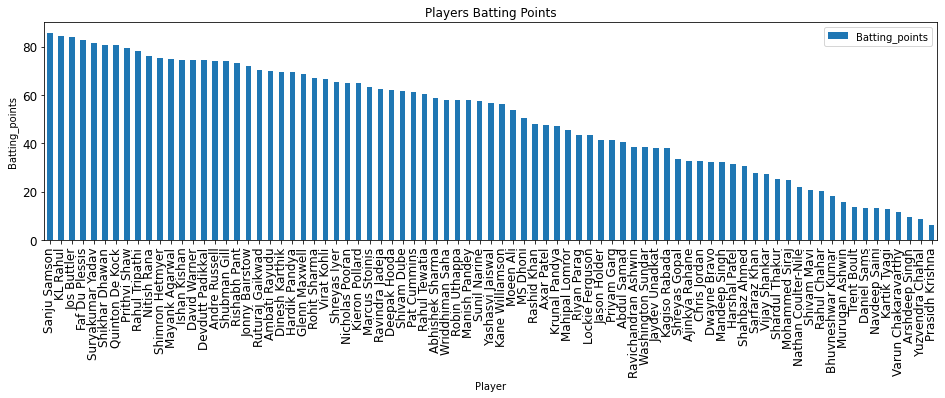

In [78]:
batsman_shortlist_subset['Batting_points'] = (batsman_shortlist_subset['P_Runs'] * 0.6) + (batsman_shortlist_subset['P_SR'] * 0.25) + (batsman_shortlist_subset['P_BPBF'] * 0.15)
batsman_shortlist_subset = batsman_shortlist_subset.sort_values(by = 'Batting_points', ascending = False) 
batsman_shortlist_subset['Batting_points'] = batsman_shortlist_subset['Batting_points'].astype(float)
batsman_shortlist_subset['Batting_points'] = round((batsman_shortlist_subset['Batting_points']),2)


batsman_shortlist_subset['P_Batting_points'] = batsman_shortlist_subset.Batting_points.rank(pct = True)
batsman_shortlist_subset['P_Batting_points'] = batsman_shortlist_subset['P_Batting_points']  * 100
batsman_shortlist_subset['P_Batting_points'] = batsman_shortlist_subset['P_Batting_points'].astype(float)
batsman_shortlist_subset['P_Batting_points'] = round((batsman_shortlist_subset['P_Batting_points']),2)
batsman_shortlist_subset

batsman_shortlist_subset.to_csv('Batsman_performance_updated.csv')

batsman_shortlist_subset.plot.bar(x = 'Player', y = 'Batting_points', figsize=(16,4),
            title='Players Batting Points', 
            xlabel='Player', 
            ylabel='Batting_points',
            fontsize='large')
#plot.savefig('Bar_plot_batsman_1.jpeg')


In [79]:
#batsman_shortlist_subset = batsman_shortlist_subset.loc[batsman_shortlist_subset['P_BPBF_20']]
#batsman_shortlist_subset = batsman_shortlist_subset.max()
#batsman_shortlist_subset

In [80]:
batsman_shortlist_subset

1,PID,Player,Origin,Runs_20,Runs_21,Runs_22,BPBF_20,BPBF_21,BPBF_22,SR_20,...,P_SR_21,P_SR_22,P_BPBF_20,P_BPBF_21,P_BPBF_22,P_Runs,P_SR,P_BPBF,Batting_points,P_Batting_points
10,I68,Sanju Samson,Indian,375,484,458,0.199153,0.175141,0.221154,158.90,...,70.37,76.54,85.19,70.37,83.95,89.71,79.83,79.84,85.76,100.00
21,I33,KL Rahul,Indian,670,626,616,0.156371,0.172949,0.164835,129.34,...,75.31,58.02,58.02,67.90,44.44,98.77,66.67,56.79,84.45,98.77
42,O26,Jos Buttler,Overseas,328,254,863,0.189427,0.240964,0.221071,144.49,...,92.59,81.48,80.25,95.06,82.72,82.71,85.60,86.01,83.93,97.53
9,O17,Faf Du Plessis,Overseas,449,633,468,0.175549,0.181223,0.168937,140.75,...,74.07,46.91,72.84,74.07,48.15,93.83,66.25,65.02,82.61,96.30
38,I80,Suryakumar Yadav,Indian,480,317,303,0.217523,0.226244,0.1875,145.02,...,82.72,74.07,91.36,91.36,67.28,81.07,80.66,83.33,81.31,95.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,I30,Kartik Tyagi,Indian,4,2,7,0,0,0.166667,66.67,...,7.41,29.63,9.26,7.41,46.91,9.47,16.26,21.19,12.93,6.17
27,I83,Varun Chakaravarthy,Indian,10,2,12,0,0,0.111111,66.67,...,7.41,8.64,9.26,7.41,16.67,12.55,9.26,11.11,11.51,4.94
50,I07,Arshdeep Singh,Indian,0,2,21,0,0,0.103448,0.00,...,12.35,9.88,9.26,7.41,12.96,9.47,8.44,9.88,9.27,3.70
5,I89,Yuzvendra Chahal,Indian,1,10,5,0,0,0,33.33,...,4.94,7.41,9.26,7.41,4.94,9.88,6.17,7.20,8.55,2.47


In [81]:
bowler_shortlist = pd.read_excel('Data Wrangling - IPL Players & Auction price value - Group 8 v2.41.xlsx', sheet_name = 'IPL - Bowler Shortlist')

new_header = bowler_shortlist.iloc[1] # grab the first row for the header
bowler_shortlist = bowler_shortlist[2:] # take the data less the header row 
bowler_shortlist.columns = new_header # set the header row as batsman_database header
bowler_shortlist

file = pd.read_excel("Data Wrangling - IPL Players & Auction price value - Group 8 v2.41.xlsx", sheet_name = 'IPL - Bowler Shortlist')
profile = ProfileReport(file, title = "profile")
profile.to_file("Profile_report_Bowler_Performance_before.html") 


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [82]:
#bowler_shortlist_subset = bowler_shortlist_subset.rename(columns = {' 20':'Runs_20','Runs 21':'Runs_21','Runs 22': 'Runs_22'})
bowler_shortlist = bowler_shortlist.rename(columns = {'Wkts 20':'Wkts_20','Wkts 21':'Wkts_21','Wkts 22': 'Wkts_22','Flag to check player origin in Auction data': 'Origin'})
bowler_shortlist = bowler_shortlist.rename(columns = {'Econ 20':'Econ_20','Econ 21':'Econ_21','Econ 22': 'Econ_22'})
bowler_shortlist = bowler_shortlist.rename(columns = {'Avg 20':'Avg_20','Avg 21':'Avg_21','Avg 22': 'Avg_22'})
bowler_shortlist

1,PID,Player,Origin,Flag for 2020,Flag for 2021,Flag for 2022,Flag for 2020,Flag for 2021,Flag for 2022,Total Matches 2020,...,Inns 22,Wkts_20,Wkts_21,Wkts_22,Econ_20,Econ_21,Econ_22,Avg_20,Avg_21,Avg_22
2,I89,Yuzvendra Chahal,Indian,0,0,1,1,1,1,15,...,17,21,18,27,7.08,7.05,7.75,19.28,20.77,19.51
3,O28,Kagiso Rabada,Overseas,0,0,1,1,1,1,17,...,13,30,15,23,8.34,8.14,8.45,18.26,30.4,17.65
4,I42,Mohammad Shami,Indian,0,0,1,1,1,1,14,...,16,20,19,20,8.57,7.5,8,23,20.78,24.4
5,O27,Josh Hazlewood,Overseas,1,0,1,1,1,1,3,...,12,1,11,20,6.4,8.37,8.1,64,26.63,18.85
6,O58,Rashid Khan,Overseas,1,1,1,1,1,1,16,...,16,20,18,19,5.37,6.69,6.59,17.2,20.83,22.15
7,I20,Harshal Patel,Indian,0,0,1,1,1,1,5,...,15,3,32,19,8.93,8.14,7.66,44.66,14.34,21.57
8,I51,Prasidh Krishna,Indian,0,0,1,1,1,1,6,...,17,4,12,19,9.37,9.11,8.28,41,29.25,29
9,I81,T Natarajan,Indian,1,1,1,1,1,1,16,...,11,16,2,18,8.02,8.62,9.44,31.5,34.5,22.55
10,O05,Andre Russell,Overseas,1,1,1,1,1,1,10,...,13,6,11,17,9.72,9.89,9.86,29.16,17.09,16.35
11,O82,Trent Boult,Overseas,0,0,1,1,1,1,15,...,16,25,13,16,7.97,7.9,7.93,18.28,31.23,30.75


In [83]:
bowler_shortlist_subset = bowler_shortlist[['PID','Player','Origin','Wkts_20','Wkts_21','Wkts_22','Econ_20','Econ_21','Econ_22','Avg_20','Avg_21','Avg_22']]
bowler_shortlist['P_Wkts_20'] = bowler_shortlist.Wkts_20.rank(pct = True)
bowler_shortlist['P_Wkts_20'] = bowler_shortlist['P_Wkts_20'] * 100
bowler_shortlist['P_Wkts_20'] = bowler_shortlist['P_Wkts_20'].astype(float)
bowler_shortlist['P_Wkts_20'] = round((bowler_shortlist['P_Wkts_20']),2)

bowler_shortlist['P_Wkts_21'] = bowler_shortlist.Wkts_21.rank(pct = True)
bowler_shortlist['P_Wkts_21'] = bowler_shortlist['P_Wkts_21']  * 100
bowler_shortlist['P_Wkts_21'] = bowler_shortlist['P_Wkts_21'].astype(float)
bowler_shortlist['P_Wkts_21'] = round((bowler_shortlist['P_Wkts_21']),2)

bowler_shortlist['P_Wkts_22'] = bowler_shortlist.Wkts_22.rank(pct = True)
bowler_shortlist['P_Wkts_22'] = bowler_shortlist['P_Wkts_22']  * 100
bowler_shortlist['P_Wkts_22'] = bowler_shortlist['P_Wkts_22'].astype(float)
bowler_shortlist['P_Wkts_22'] = round((bowler_shortlist['P_Wkts_22']),2)

bowler_shortlist['P_Wkts_Avg'] = (bowler_shortlist['P_Wkts_20'] + bowler_shortlist['P_Wkts_21'] + bowler_shortlist['P_Wkts_22'] ) / 3
bowler_shortlist['P_Wkts_Avg'] = bowler_shortlist['P_Wkts_Avg'].astype(float)
bowler_shortlist['P_Wkts_Avg'] = round((bowler_shortlist['P_Wkts_Avg']),2)

bowler_shortlist_subset = bowler_shortlist[['PID','Player','Origin','Wkts_20','Wkts_21','Wkts_22','Econ_20','Econ_21','Econ_22','Avg_20','Avg_21','Avg_22','P_Wkts_20','P_Wkts_21','P_Wkts_22']]
bowler_shortlist_subset

1,PID,Player,Origin,Wkts_20,Wkts_21,Wkts_22,Econ_20,Econ_21,Econ_22,Avg_20,Avg_21,Avg_22,P_Wkts_20,P_Wkts_21,P_Wkts_22
2,I89,Yuzvendra Chahal,Indian,21,18,27,7.08,7.05,7.75,19.28,20.77,19.51,90.24,86.59,100.00
3,O28,Kagiso Rabada,Overseas,30,15,23,8.34,8.14,8.45,18.26,30.4,17.65,100.00,74.39,97.56
4,I42,Mohammad Shami,Indian,20,19,20,8.57,7.5,8,23,20.78,24.4,86.59,92.68,93.90
5,O27,Josh Hazlewood,Overseas,1,11,20,6.4,8.37,8.1,64,26.63,18.85,3.66,47.56,93.90
6,O58,Rashid Khan,Overseas,20,18,19,5.37,6.69,6.59,17.2,20.83,22.15,86.59,86.59,87.80
7,I20,Harshal Patel,Indian,3,32,19,8.93,8.14,7.66,44.66,14.34,21.57,12.20,100.00,87.80
8,I51,Prasidh Krishna,Indian,4,12,19,9.37,9.11,8.28,41,29.25,29,19.51,56.10,87.80
9,I81,T Natarajan,Indian,16,2,18,8.02,8.62,9.44,31.5,34.5,22.55,80.49,6.10,82.93
10,O05,Andre Russell,Overseas,6,11,17,9.72,9.89,9.86,29.16,17.09,16.35,31.71,47.56,80.49
11,O82,Trent Boult,Overseas,25,13,16,7.97,7.9,7.93,18.28,31.23,30.75,95.12,64.63,75.61


In [84]:
#bowler_shortlist_subset = bowler_shortlist[['PID','Player','Origin','Wkts_20','Wkts_21','Wkts_22','Econ_20','Econ_21','Econ_22','Avg_20','Avg_21','Avg_22']]
bowler_shortlist['P_Econ_20'] = bowler_shortlist.Econ_20.rank(ascending = False,pct = True)
bowler_shortlist['P_Econ_20'] =   bowler_shortlist['P_Econ_20'] * 100
bowler_shortlist['P_Econ_20'] = bowler_shortlist['P_Econ_20'].astype(float)
bowler_shortlist['P_Econ_20'] = round((bowler_shortlist['P_Econ_20']),2)

bowler_shortlist['P_Econ_21'] = bowler_shortlist.Econ_21.rank(ascending = False,pct = True)
bowler_shortlist['P_Econ_21'] =  bowler_shortlist['P_Econ_21']  * 100
bowler_shortlist['P_Econ_21'] = bowler_shortlist['P_Econ_21'].astype(float)
bowler_shortlist['P_Econ_21'] = round((bowler_shortlist['P_Econ_21']),2)

bowler_shortlist['P_Econ_22'] = bowler_shortlist.Econ_22.rank(ascending = False,pct = True)
bowler_shortlist['P_Econ_22'] =  bowler_shortlist['P_Econ_22']  * 100
bowler_shortlist['P_Econ_22'] = bowler_shortlist['P_Econ_22'].astype(float)
bowler_shortlist['P_Econ_22'] = round((bowler_shortlist['P_Econ_22']),2)

bowler_shortlist['P_Econ_Avg'] = (bowler_shortlist['P_Econ_20'] + bowler_shortlist['P_Econ_21'] + bowler_shortlist['P_Econ_22']) / 3

bowler_shortlist['P_Econ_Avg'] = bowler_shortlist['P_Econ_Avg'].astype(float)
bowler_shortlist['P_Econ_Avg'] = round((bowler_shortlist['P_Econ_Avg']),2)

bowler_shortlist_subset = bowler_shortlist[['PID','Player','Origin','Wkts_20','Wkts_21','Wkts_22','Econ_20','Econ_21','Econ_22','Avg_20','Avg_21','Avg_22','P_Wkts_20','P_Wkts_21','P_Wkts_22','P_Econ_20','P_Econ_21','P_Econ_22']]
bowler_shortlist_subset


1,PID,Player,Origin,Wkts_20,Wkts_21,Wkts_22,Econ_20,Econ_21,Econ_22,Avg_20,Avg_21,Avg_22,P_Wkts_20,P_Wkts_21,P_Wkts_22,P_Econ_20,P_Econ_21,P_Econ_22
2,I89,Yuzvendra Chahal,Indian,21,18,27,7.08,7.05,7.75,19.28,20.77,19.51,90.24,86.59,100.00,82.93,78.05,65.85
3,O28,Kagiso Rabada,Overseas,30,15,23,8.34,8.14,8.45,18.26,30.4,17.65,100.00,74.39,97.56,43.90,32.93,46.34
4,I42,Mohammad Shami,Indian,20,19,20,8.57,7.5,8,23,20.78,24.4,86.59,92.68,93.90,32.93,56.10,58.54
5,O27,Josh Hazlewood,Overseas,1,11,20,6.4,8.37,8.1,64,26.63,18.85,3.66,47.56,93.90,95.12,26.83,53.66
6,O58,Rashid Khan,Overseas,20,18,19,5.37,6.69,6.59,17.2,20.83,22.15,86.59,86.59,87.80,100.00,82.93,97.56
7,I20,Harshal Patel,Indian,3,32,19,8.93,8.14,7.66,44.66,14.34,21.57,12.20,100.00,87.80,21.95,32.93,73.17
8,I51,Prasidh Krishna,Indian,4,12,19,9.37,9.11,8.28,41,29.25,29,19.51,56.10,87.80,17.07,7.32,51.22
9,I81,T Natarajan,Indian,16,2,18,8.02,8.62,9.44,31.5,34.5,22.55,80.49,6.10,82.93,56.10,21.95,29.27
10,O05,Andre Russell,Overseas,6,11,17,9.72,9.89,9.86,29.16,17.09,16.35,31.71,47.56,80.49,4.88,4.88,17.07
11,O82,Trent Boult,Overseas,25,13,16,7.97,7.9,7.93,18.28,31.23,30.75,95.12,64.63,75.61,58.54,46.34,60.98


In [85]:
bowler_shortlist_subset.max()

1
PID                       O82
Player       Yuzvendra Chahal
Origin               Overseas
Wkts_20                    30
Wkts_21                    32
Wkts_22                    27
Econ_20                  9.91
Econ_21                 10.47
Econ_22                 11.28
Avg_20                     64
Avg_21                     97
Avg_22                     84
P_Wkts_20               100.0
P_Wkts_21               100.0
P_Wkts_22               100.0
P_Econ_20               100.0
P_Econ_21               100.0
P_Econ_22               100.0
dtype: object

In [86]:
bowler_shortlist['P_Avg_20'] = bowler_shortlist.Avg_20.rank(ascending = False,pct = True)
bowler_shortlist['P_Avg_20'] =   bowler_shortlist['P_Avg_20'] * 100
bowler_shortlist['P_Avg_20'] = bowler_shortlist['P_Avg_20'].astype(float)
bowler_shortlist['P_Avg_20'] = round((bowler_shortlist['P_Avg_20']),2)

bowler_shortlist['P_Avg_21'] = bowler_shortlist.Avg_21.rank(ascending = False,pct = True)
bowler_shortlist['P_Avg_21'] =  bowler_shortlist['P_Avg_21']  * 100
bowler_shortlist['P_Avg_21'] = bowler_shortlist['P_Avg_21'].astype(float)
bowler_shortlist['P_Avg_21'] = round((bowler_shortlist['P_Avg_21']),2)

bowler_shortlist['P_Avg_22'] = bowler_shortlist.Avg_22.rank(ascending = False,pct = True)
bowler_shortlist['P_Avg_22'] =  bowler_shortlist['P_Avg_22']  * 100
bowler_shortlist['P_Avg_22'] = bowler_shortlist['P_Avg_22'].astype(float)
bowler_shortlist['P_Avg_22'] = round((bowler_shortlist['P_Avg_22']),2)

bowler_shortlist['P_Avg_Avg'] =  (bowler_shortlist['P_Avg_20'] + bowler_shortlist['P_Avg_21'] + bowler_shortlist['P_Avg_22']) / 3
bowler_shortlist['P_Avg_Avg'] = bowler_shortlist['P_Avg_Avg'].astype(float)
bowler_shortlist['P_Avg_Avg'] = round((bowler_shortlist['P_Avg_Avg']),2)

bowler_shortlist_subset = bowler_shortlist[['PID','Player','Origin','Wkts_20','Wkts_21','Wkts_22','Econ_20','Econ_21','Econ_22','Avg_20','Avg_21','Avg_22','P_Wkts_20','P_Wkts_21','P_Wkts_22','P_Econ_20','P_Econ_21','P_Econ_22','P_Avg_20','P_Avg_21','P_Avg_22','P_Wkts_Avg','P_Econ_Avg','P_Avg_Avg']]

bowler_shortlist_subset

1,PID,Player,Origin,Wkts_20,Wkts_21,Wkts_22,Econ_20,Econ_21,Econ_22,Avg_20,...,P_Wkts_22,P_Econ_20,P_Econ_21,P_Econ_22,P_Avg_20,P_Avg_21,P_Avg_22,P_Wkts_Avg,P_Econ_Avg,P_Avg_Avg
2,I89,Yuzvendra Chahal,Indian,21,18,27,7.08,7.05,7.75,19.28,...,100.00,82.93,78.05,65.85,87.80,70.73,90.24,92.28,75.61,82.92
3,O28,Kagiso Rabada,Overseas,30,15,23,8.34,8.14,8.45,18.26,...,97.56,43.90,32.93,46.34,92.68,36.59,97.56,90.65,41.06,75.61
4,I42,Mohammad Shami,Indian,20,19,20,8.57,7.5,8,23,...,93.90,32.93,56.10,58.54,75.61,68.29,70.73,91.06,49.19,71.54
5,O27,Josh Hazlewood,Overseas,1,11,20,6.4,8.37,8.1,64,...,93.90,95.12,26.83,53.66,2.44,43.90,92.68,48.37,58.54,46.34
6,O58,Rashid Khan,Overseas,20,18,19,5.37,6.69,6.59,17.2,...,87.80,100.00,82.93,97.56,95.12,65.85,78.05,86.99,93.50,79.67
7,I20,Harshal Patel,Indian,3,32,19,8.93,8.14,7.66,44.66,...,87.80,21.95,32.93,73.17,19.51,97.56,80.49,66.67,42.68,65.85
8,I51,Prasidh Krishna,Indian,4,12,19,9.37,9.11,8.28,41,...,87.80,17.07,7.32,51.22,24.39,39.02,53.66,54.47,25.20,39.02
9,I81,T Natarajan,Indian,16,2,18,8.02,8.62,9.44,31.5,...,82.93,56.10,21.95,29.27,41.46,26.83,75.61,56.51,35.77,47.97
10,O05,Andre Russell,Overseas,6,11,17,9.72,9.89,9.86,29.16,...,80.49,4.88,4.88,17.07,53.66,90.24,100.00,53.25,8.94,81.30
11,O82,Trent Boult,Overseas,25,13,16,7.97,7.9,7.93,18.28,...,75.61,58.54,46.34,60.98,90.24,31.71,48.78,78.45,55.29,56.91


<AxesSubplot:title={'center':'Players Bowling Points'}, xlabel='Player', ylabel='Bowling_points'>

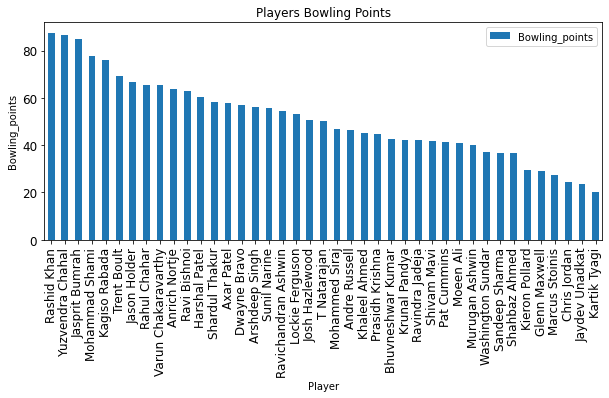

In [87]:
bowler_shortlist_subset['Bowling_points'] =  (bowler_shortlist_subset['P_Wkts_Avg'] * 0.6) + (bowler_shortlist_subset['P_Econ_Avg'] * 0.25) + (bowler_shortlist_subset['P_Avg_Avg'] * 0.15)
bowler_shortlist_subset = bowler_shortlist_subset.sort_values(by = 'Bowling_points', ascending = False)
bowler_shortlist_subset

bowler_shortlist_subset['P_Bowling_points'] = bowler_shortlist_subset.Bowling_points.rank(pct = True)
bowler_shortlist_subset['P_Bowling_points'] = bowler_shortlist_subset['P_Bowling_points']  * 100
bowler_shortlist_subset['P_Bowling_points'] = bowler_shortlist_subset['P_Bowling_points'].astype(float)
bowler_shortlist_subset['P_Bowling_points'] = round((bowler_shortlist_subset['P_Bowling_points']),2)
bowler_shortlist_subset.to_csv('Bowler_performance_updated.csv')
bowler_shortlist_subset

bowler_shortlist_subset.plot.bar(x = 'Player', y = 'Bowling_points', figsize=(10,4),
            title='Players Bowling Points', 
            xlabel='Player', 
            ylabel='Bowling_points',
            fontsize='large')
#plt.savefig('Bar_plot_bowler_1.jpeg')

In [88]:
import pandas as pd
from pandas_profiling import ProfileReport
#import pdfkit

file = pd.read_csv("Batsman_Performance_updated.csv")
profile = ProfileReport(file, title = "profile")
profile.to_file("Profile_report_Batsman_Performance_updated.html") 


file = pd.read_csv("Bowler_Performance_updated.csv")
profile = ProfileReport(file, title = "profile")
profile.to_file("Profile_report_Bowler_Performance_updated.html") 


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [89]:
import pandas as pd
auction_prices = pd.read_excel('Data Wrangling - IPL Players & Auction price value - Group 8 v2.5.xlsx', sheet_name = 'IPLPlayerAuctionData (20-22)')
auction_prices

new_header = auction_prices.iloc[1] # grab the first row for the header
auction_prices = auction_prices[2:] # take the data less the header row 
auction_prices.columns = new_header # set the header row as batsman_database header
auction_prices

1,Player,Role,Amount,Amount (in Cr),Team,Year,Player Origin
2,Aaron Finch,Batsman,44000000,4.4,Royal Challengers Bangalore,2020,Overseas
3,Abdul Samad,All-Rounder,2000000,0.2,Sunrisers Hyderabad,2020,Indian
4,Abhijeet Tomar,Batsman,4000000,0.4,Kolkata Knight Riders,2022,Indian
5,Abhinav Sadarangani,Batsman,26000000,2.6,Gujarat Titans,2022,Indian
6,Abhishek Sharma,All-Rounder,65000000,6.5,Sunrisers Hyderabad,2022,Indian
...,...,...,...,...,...,...,...
530,Mandeep Singh,NaN,NaN,1.4,NaN,2021,Indian
531,Mohammad Shami,NaN,NaN,4.8,NaN,2021,Indian
532,Josh Hazlewood,NaN,NaN,2,NaN,2021,Overseas
533,Ravi Bishnoi,NaN,NaN,2,NaN,2021,Indian


In [90]:
auction_prices_2020 = auction_prices.loc[auction_prices['Year'] == 2020]
auction_prices_2021 = auction_prices.loc[auction_prices['Year'] == 2021]
auction_prices_2022 = auction_prices.loc[auction_prices['Year'] == 2022]
auction_prices_2020 = auction_prices_2020.rename(columns = {'Amount (in Cr)': 'Auction_Price_in_Cr_2020'})
auction_prices_2021 = auction_prices_2021.rename(columns = {'Amount (in Cr)': 'Auction_Price_in_Cr_2021'})
auction_prices_2022 = auction_prices_2022.rename(columns = {'Amount (in Cr)': 'Auction_Price_in_Cr_2022'})


In [91]:
auction_prices_2020 = auction_prices_2020[['Player','Auction_Price_in_Cr_2020']]
auction_prices_2021 = auction_prices_2021[['Player','Auction_Price_in_Cr_2021']]
auction_prices_2022 = auction_prices_2022[['Player','Auction_Price_in_Cr_2022']]

In [92]:
auction_prices_2022

1,Player,Auction_Price_in_Cr_2022
4,Abhijeet Tomar,0.4
5,Abhinav Sadarangani,2.6
6,Abhishek Sharma,6.5
8,Adam Milne,1.9
9,Aiden Markram,2.6
...,...,...
431,Marcus Stoinis,9.2
432,Moeen Ali,8
433,Abdul Samad,4
434,Yashasvi Jaiswal,4


In [93]:
bowler_shortlist_subset = bowler_shortlist_subset.merge(auction_prices_2020,on = 'Player', how = 'inner')
bowler_shortlist_subset = bowler_shortlist_subset.merge(auction_prices_2021,on = 'Player', how = 'inner')
bowler_shortlist_subset = bowler_shortlist_subset.merge(auction_prices_2022,on = 'Player', how = 'inner')
bowler_shortlist_subset    

bowler_shortlist_subset['Players_Total_Auction_price'] = bowler_shortlist_subset['Auction_Price_in_Cr_2020'] + bowler_shortlist_subset['Auction_Price_in_Cr_2021'] + bowler_shortlist_subset['Auction_Price_in_Cr_2022']       
bowler_shortlist_subset['Players_Average_Auction_price'] = (bowler_shortlist_subset['Auction_Price_in_Cr_2020'] + bowler_shortlist_subset['Auction_Price_in_Cr_2021'] + bowler_shortlist_subset['Auction_Price_in_Cr_2022']) / 3
bowler_shortlist_subset['Players_Average_Auction_price'] = bowler_shortlist_subset['Players_Average_Auction_price'].astype(float)
bowler_shortlist_subset['Players_Average_Auction_price'] = round((bowler_shortlist_subset['Players_Average_Auction_price']),2)
bowler_shortlist_subset = bowler_shortlist_subset.sort_values(by = 'Players_Average_Auction_price', ascending = False) 
bowler_shortlist_subset.to_csv('Bowler_Auction_Prices.csv')
bowler_shortlist_subset = bowler_shortlist_subset[['PID','Player','Origin','Bowling_points','Players_Total_Auction_price']]
bowler_shortlist_subset = bowler_shortlist_subset.sort_values(by = 'Bowling_points', ascending = False) 
bowler_shortlist_subset
 

1,PID,Player,Origin,Bowling_points,Players_Total_Auction_price
0,O58,Rashid Khan,Overseas,87.5195,33
1,I89,Yuzvendra Chahal,Indian,86.7085,19.0
2,I23,Jasprit Bumrah,Indian,84.6710,26
3,I42,Mohammad Shami,Indian,77.6645,15.85
4,O28,Kagiso Rabada,Overseas,75.9965,17.65
5,O82,Trent Boult,Overseas,69.4290,12.4
6,O22,Jason Holder,Overseas,66.8680,10.25
7,I55,Rahul Chahar,Indian,65.4835,9.05
8,I83,Varun Chakaravarthy,Indian,65.2455,16
9,O06,Anrich Nortje,Overseas,63.8600,7.5


In [94]:
batsman_shortlist_subset = batsman_shortlist_subset.merge(auction_prices_2020,on = 'Player', how = 'inner')
batsman_shortlist_subset = batsman_shortlist_subset.merge(auction_prices_2021,on = 'Player', how = 'inner')
batsman_shortlist_subset = batsman_shortlist_subset.merge(auction_prices_2022,on = 'Player', how = 'inner')
batsman_shortlist_subset['Players_Total_Auction_price'] = batsman_shortlist_subset['Auction_Price_in_Cr_2020'] + batsman_shortlist_subset['Auction_Price_in_Cr_2021'] + batsman_shortlist_subset['Auction_Price_in_Cr_2022']       
batsman_shortlist_subset['Players_Average_Auction_price'] = (batsman_shortlist_subset['Auction_Price_in_Cr_2020'] + batsman_shortlist_subset['Auction_Price_in_Cr_2021'] + batsman_shortlist_subset['Auction_Price_in_Cr_2022']) / 3 
batsman_shortlist_subset['Players_Average_Auction_price'] = batsman_shortlist_subset['Players_Average_Auction_price'].astype(float)
batsman_shortlist_subset['Players_Average_Auction_price'] = round((batsman_shortlist_subset['Players_Average_Auction_price']),2)
batsman_shortlist_subset = batsman_shortlist_subset.sort_values(by = 'Players_Average_Auction_price', ascending = False) 
batsman_shortlist_subset.to_csv('Batsman_Auction_Prices.csv')
batsman_shortlist_subset = batsman_shortlist_subset[['PID','Player','Origin','Batting_points','Players_Total_Auction_price']]

batsman_shortlist_subset = batsman_shortlist_subset.sort_values(by = 'Batting_points', ascending = False) 
batsman_shortlist_subset


1,PID,Player,Origin,Batting_points,Players_Total_Auction_price
0,I68,Sanju Samson,Indian,85.76,30
1,I33,KL Rahul,Indian,84.45,39
2,O26,Jos Buttler,Overseas,83.93,18.8
3,O17,Faf Du Plessis,Overseas,82.61,10.2
4,I80,Suryakumar Yadav,Indian,81.31,14.4
...,...,...,...,...,...
76,I30,Kartik Tyagi,Indian,12.93,6.6
77,I83,Varun Chakaravarthy,Indian,11.51,16
78,I07,Arshdeep Singh,Indian,9.27,4.4
79,I89,Yuzvendra Chahal,Indian,8.55,19.0


In [95]:
batsman_shortlist_subset_Indian = batsman_shortlist_subset.loc[batsman_shortlist_subset['Origin'] == 'Indian']
batsman_shortlist_subset_Overseas = batsman_shortlist_subset.loc[batsman_shortlist_subset['Origin'] == 'Overseas']
batsman_shortlist_subset_Indian

1,PID,Player,Origin,Batting_points,Players_Total_Auction_price
1,I33,KL Rahul,Indian,84.45,39
4,I80,Suryakumar Yadav,Indian,81.31,14.4
5,I72,Shikhar Dhawan,Indian,80.83,18.65
8,I57,Rahul Tripathi,Indian,78.15,9.7
9,I49,Nitish Rana,Indian,76.11,14.8
11,I40,Mayank Agarwal,Indian,74.67,14
12,I21,Ishan Kishan,Indian,74.40,36.7
14,I14,Devdutt Padikkal,Indian,74.26,8.15
17,I62,Rishabh Pant,Indian,73.02,32
20,I04,Ambati Rayudu,Indian,69.92,11.15


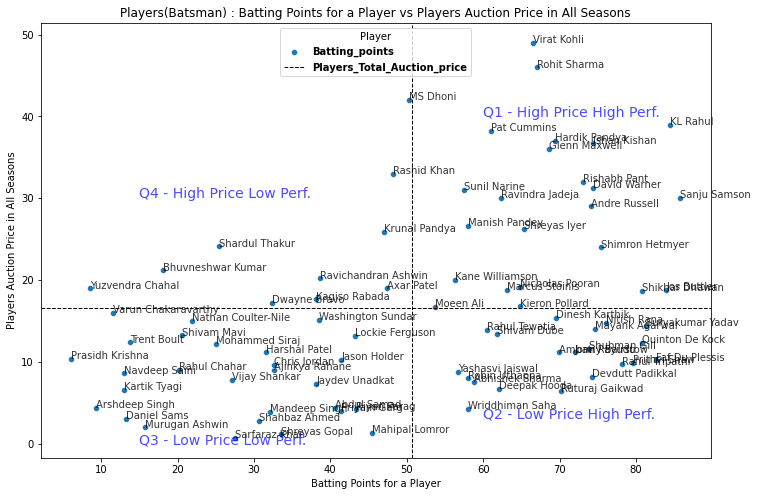

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


abbr={'Players_Total_Auction_price':'Players Auction Price in All Seasons',
      'Batting_points':'Batting Points for a Player'}

#fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
sns.scatterplot(data=batsman_shortlist_subset, x='Batting_points', y='Players_Total_Auction_price')

plt.title(f"Players(Batsman) : {abbr['Batting_points']} vs {abbr['Players_Total_Auction_price']}")
plt.xlabel(abbr['Batting_points'])
plt.ylabel(abbr['Players_Total_Auction_price'])
          
for i in range(batsman_shortlist_subset.shape[0]):
    plt.text(batsman_shortlist_subset.Batting_points[i], y=batsman_shortlist_subset.Players_Total_Auction_price[i], s=batsman_shortlist_subset.Player[i], alpha=0.8)

plt.text(x=60, y=40, s="Q1 - High Price High Perf.",alpha=0.7,fontsize=14, color='b')
plt.text(x=15, y=0, s="Q3 - Low Price Low Perf.",alpha=0.7,fontsize=14, color='b')
plt.text(x=15, y=30, s="Q4 - High Price Low Perf.", alpha=0.7,fontsize=14, color='b')
plt.text(x=60, y=3, s="Q2 - Low Price High Perf.", alpha=0.7,fontsize=14, color='b')          

#Mean values          
plt.axhline(y=batsman_shortlist_subset.Players_Total_Auction_price.mean(), color='k', linestyle='--', linewidth=1)           
plt.axvline(x=batsman_shortlist_subset.Batting_points.mean(), color='k',linestyle='--', linewidth=1)     

legend_properties = {'weight':'bold'}

plt.legend(['Batting_points', 'Players_Total_Auction_price'], loc='upper center',prop=legend_properties ,title='Player')
plt.savefig('Quadrant_plot_batsman_1.jpeg')

    
plt.show()

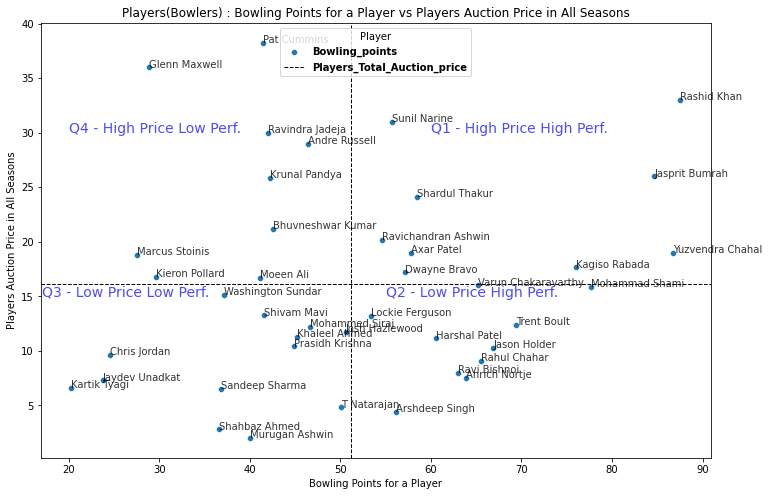

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


abbr={'Players_Total_Auction_price':'Players Auction Price in All Seasons',
      'Bowling_points':'Bowling Points for a Player'}

#fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
sns.scatterplot(data=bowler_shortlist_subset, x='Bowling_points', y='Players_Total_Auction_price')

plt.title(f"Players(Bowlers) : {abbr['Bowling_points']} vs {abbr['Players_Total_Auction_price']}")
plt.xlabel(abbr['Bowling_points'])
plt.ylabel(abbr['Players_Total_Auction_price'])
          
for i in range(bowler_shortlist_subset.shape[0]):
    plt.text(bowler_shortlist_subset.Bowling_points[i], y=bowler_shortlist_subset.Players_Total_Auction_price[i], s=bowler_shortlist_subset.Player[i], alpha=0.8)

plt.text(x=60, y=30, s="Q1 - High Price High Perf.",alpha=0.7,fontsize=14, color='b')
plt.text(x=17, y=15, s="Q3 - Low Price Low Perf.",alpha=0.7,fontsize=14, color='b')
plt.text(x=20, y=30, s="Q4 - High Price Low Perf.", alpha=0.7,fontsize=14, color='b')
plt.text(x=55, y=15, s="Q2 - Low Price High Perf.", alpha=0.7,fontsize=14, color='b')          

legend_properties = {'weight':'bold'}

#Mean values          
plt.axhline(y=bowler_shortlist_subset.Players_Total_Auction_price.mean(), color='k', linestyle='--', linewidth=1)           
plt.axvline(x=bowler_shortlist_subset.Bowling_points.mean(), color='k',linestyle='--', linewidth=1)     
plt.legend(['Bowling_points', 'Players_Total_Auction_price'], loc='upper center',prop=legend_properties, title='Player')


plt.savefig('Quadrant_plot_bowlers_2.jpeg')
    
plt.show()